# Extended Data Figure 1 – Generation of a TP53 prime editing sensor library with PEGG.

## Extended Data Figure 1b
Breakdown of the TP53 variants input to PEGG for sensory library design

In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import re
import scipy.stats
import regex as re
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statannot
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

In [37]:
#reading in input dataframe
input = pd.read_csv('full_input_variants.csv')

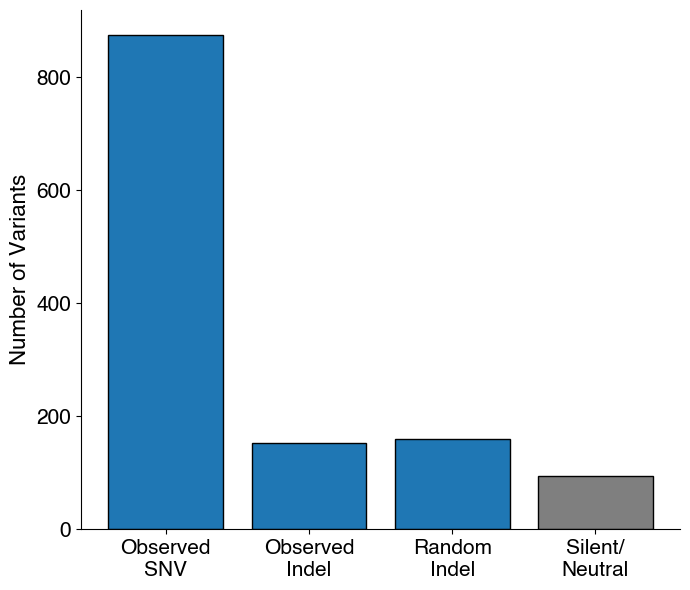

In [3]:
u, c = np.unique(input['classification'], return_counts=True)

fig, ax = plt.subplots(figsize=(7,6))
ax.bar(['Observed\nSNV', 'Observed\nIndel', 'Random\nIndel', 'Silent/\nNeutral'],c, color = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:grey'], edgecolor='black', linewidth=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Number of Variants', fontsize=16)

fig.tight_layout()

## Extended Data Figure 1c
The fraction of input variants amenable to prime editing (i.e., able to generate ≥ 1 pegRNA), separated by variant type.

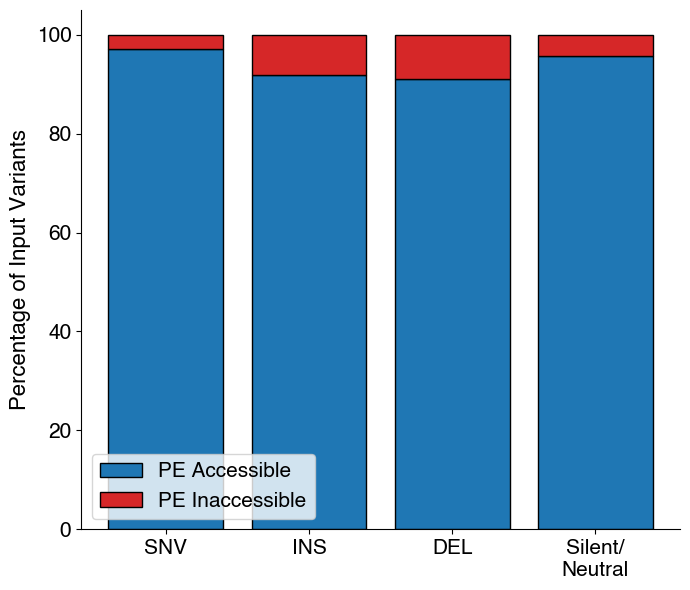

In [4]:
snv = input[input['classification']=='Observed SNV']
ins = input[input['variant_type']=='INS']
dels = input[input['variant_type']=='DEL']
neutrals = input[input['classification']=='Silent']

snv_amenable = snv[snv['PE_amenable']==True]
ins_amenable = ins[ins['PE_amenable']==True]
dels_amenable = dels[dels['PE_amenable']==True]
neutrals_amenable = neutrals[neutrals['PE_amenable']==True]

s = 100*len(snv_amenable)/len(snv)
i = 100*len(ins_amenable)/len(ins)
d = 100*len(dels_amenable)/len(dels)
n = 100*len(neutrals_amenable)/len(neutrals)

    
fig, ax = plt.subplots(figsize=(7,6))
ax.bar(['SNV', 'INS', 'DEL', 'Silent/\nNeutral'],[s,i,d,n], color = ['tab:blue'], edgecolor='black', linewidth=1, label='PE Accessible')
ax.bar(['SNV', 'INS', 'DEL', 'Silent/\nNeutral'],100-np.array([s,i,d,n]), bottom = [s,i,d,n], color = ['tab:red'], edgecolor='black', linewidth=1, label='PE Inaccessible')

ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Percentage of Input Variants', fontsize=16)

fig.tight_layout()


## Extended Data Figure 1d
Histogram of the number of pegRNA designs per variant.

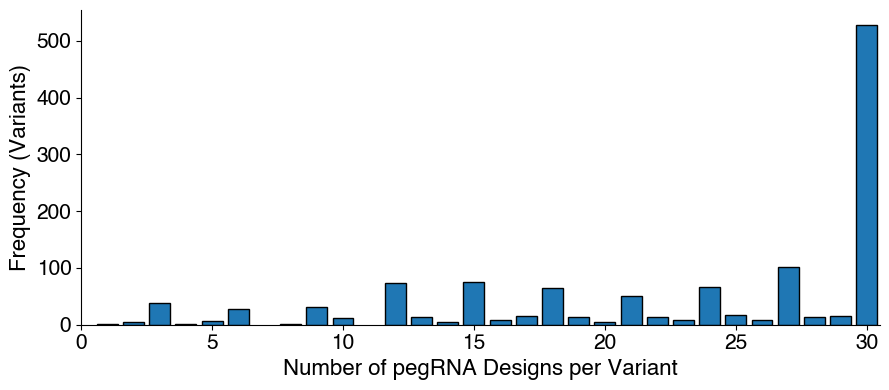

In [5]:
p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')

u, c = np.unique(p53_filtered['variant_index'], return_counts=True)

u2, c2 = np.unique(c, return_counts=True)

fig, ax = plt.subplots(figsize=(9,4))
ax.bar(u2, c2, linewidth=1, edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Frequency (Variants)', fontsize=16)
ax.set_xlabel('Number of pegRNA Designs per Variant', fontsize=16)
ax.set_xlim(0,30.5)
fig.tight_layout()

## Extended Data Figure 1e
Histogram of the MIT specificity score of the protospacers for the pegRNAs included in the library. The library was filtered to exclude pegRNAs containing a protospacer with an MIT specificity score less than 50. 


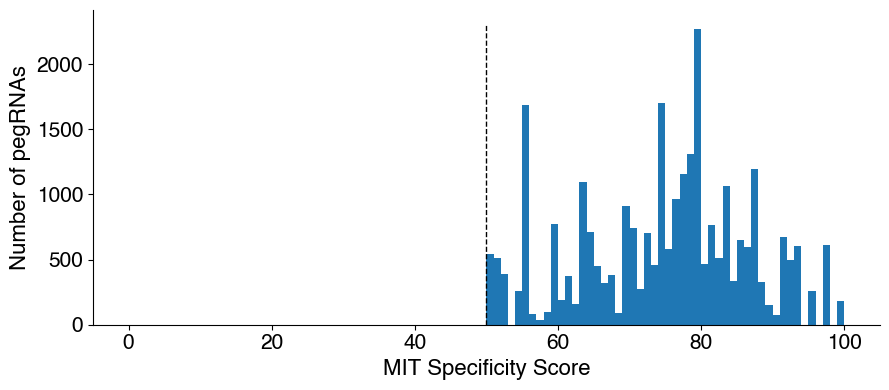

In [6]:
fig, ax = plt.subplots(figsize=(9,4))
spec = np.array(p53_filtered['MIT_specificity'])
ax.hist(spec, bins = np.linspace(0,100,101))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Number of pegRNAs', fontsize=16)
ax.set_xlabel('MIT Specificity Score', fontsize=16)

ax.plot([50,50],[0,2300], linestyle='dashed', linewidth=1, color='black')

fig.tight_layout()

# Extended Data Figure 2 – Optimization, screening, and deconvolution of the TP53 prime editing sensor library.
## Extended Data Figure 2a

Data for figure 2a was analyzed and compiled in FlowJo

## Extended Data Figure 2b
Cumulative population doublings during the course of the screen of each of the replicates in the untreated and Nutlin-treated conditions.

In [7]:
#read in CPD data (calculated from cell counts)
cpds = pd.read_csv('screen_cell_counts/cpds.csv')
cpds

days_post_transduction  untreated_REP1  untreated_REP2  untreated_REP3  \
0                        4        0.000000        0.000000        0.000000   
1                        7        0.942346        1.131521        0.824805   
2                       10        1.725110        1.968739        1.856720   
3                       13        2.772870        2.929127        2.609749   
4                       16        3.801380        3.997013        3.704098   
5                       19        4.878052        4.985175        4.778021   
6                       22        5.832249        6.123894        5.874711   
7                       25        7.070345        7.129282        6.951047   
8                       28        8.161430        8.108972        7.664149   
9                       31        9.199981        9.036263        8.704968   
10                      34       10.223735        9.932213        9.692530   

    nutlin_REP1  nutlin_REP2  nutlin_REP3  
0      0.000000     0.000000     0.000000  
1     -0.191659     0.030067    -0.218610  
2     -0.405863    -0.323890    -0.347617  
3     -0.139403     0.216219     0.127213  
4      1.077276     1.259846     1.231980  
5      2.505473     2.569266     2.569944  
6      3.666320     3.991451     3.936054  
7      4.777689     5.235245     5.124827  
8      5.885829     6.542040     6.112289  
9      7.143500     7.917476     7.156766  
10     8.152235     9.058751     8.249295

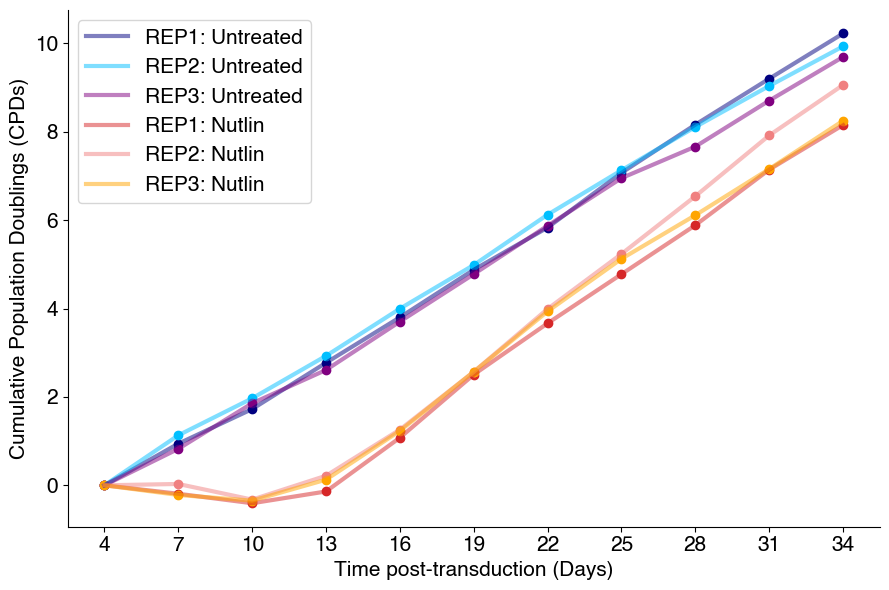

In [8]:
#making a shared plot

cpd_untreated_rep1 = cpds['untreated_REP1']
cpd_untreated_rep2 = cpds['untreated_REP2']
cpd_untreated_rep3 = cpds['untreated_REP3']
cpd_nutlin_rep1 = cpds['nutlin_REP1']
cpd_nutlin_rep2 = cpds['nutlin_REP2']
cpd_nutlin_rep3 = cpds['nutlin_REP3']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

#plotting the averages...
colors = ['navy', 'deepskyblue', 'purple']
colors2 = ['tab:red', 'lightcoral', 'orange']

#--------------Now plotting the CPDs-----------

t2 = [4,7,10,13,16,19,22,25, 28, 31, 34]
ax.plot(t2, cpd_untreated_rep1, c=colors[0], linewidth=3, alpha=.5, label='REP1: Untreated')
ax.plot(t2, cpd_untreated_rep2, c=colors[1], linewidth=3, alpha=.5, label='REP2: Untreated')
ax.plot(t2, cpd_untreated_rep3, c=colors[2], linewidth=3, alpha=.5, label='REP3: Untreated')
ax.plot(t2, cpd_nutlin_rep1, c=colors2[0], linewidth=3, alpha=.5, label='REP1: Nutlin')
ax.plot(t2, cpd_nutlin_rep2, c=colors2[1], linewidth=3, alpha=.5, label='REP2: Nutlin')
ax.plot(t2, cpd_nutlin_rep3, c=colors2[2], linewidth=3, alpha=.5, label='REP3: Nutlin')

ax.scatter(t2, cpd_untreated_rep1, c=colors[0])
ax.scatter(t2, cpd_untreated_rep2, c=colors[1])
ax.scatter(t2, cpd_untreated_rep3, c=colors[2])
ax.scatter(t2, cpd_nutlin_rep1, c=colors2[0])
ax.scatter(t2, cpd_nutlin_rep2, c=colors2[1])
ax.scatter(t2, cpd_nutlin_rep3, c=colors2[2])

ax.set_xlabel('Time post-transduction (Days)', fontsize=15)
ax.set_ylabel('Cumulative Population Doublings (CPDs)', fontsize=15)
ax.set_xticks([4,7,10,13,16,19,22,25, 28,31, 34])
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()

## Extended Data Figure 2c

Identification and counting of pegRNAs in each replicate and time-point from high quality reads (Q>30). Correct ID = reads with matching protospacer and 3’ extension. Recombined = reads with mismatched protospacer and 3’ extension. No match = reads with no matching sequence for protospacer or 3’ extension. Unaligned = reads with no identifiable tevopreQ1 sequence. Plasmid = Plasmid Library. 

In [39]:
samples = ['Plasmid-Library', 'D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

counts = []
classif = []

for name in samples:
    a = pd.read_csv(f"counts_merged/counts/{name}_counts.csv")
    b = pd.read_csv(f"counts_merged/classification/{name}_classification.csv")
    counts.append(a)
    classif.append(b)

count_dict = dict(zip(samples, counts))
class_dict = dict(zip(samples, classif))

In [40]:
c_perc = []
d_perc = []
l_perc = []
nm_perc = []
un_perc = []
corr_id_total = []
for name in samples:
    d = class_dict[name]
    
    gq = d[d['classification']=='good quality']['count'].values[0]
    dc =  d[d['classification']=="decoupled extension-protospacer"]['count'].values[0]
    corr = d[d['classification']=="correct id"]['count'].values[0]

    low_qual = sum(d[d['classification'].isin(["low_qual_r1", "low_qual_r2", "low_qual_r12"])]['count'])

    no_match = sum(d[d['classification'].isin(["no extension match", "no protospacer match"])]['count'])
    unaligned = d[d['classification']=="unaligned tevo"]['count'].values[0]

    d_perc.append(100*dc/gq)
    c_perc.append(100*corr/gq)
    l_perc.append(100*low_qual/gq)
    nm_perc.append(100*no_match/gq)
    un_perc.append(100*unaligned/gq)

    corr_id_total.append(corr)

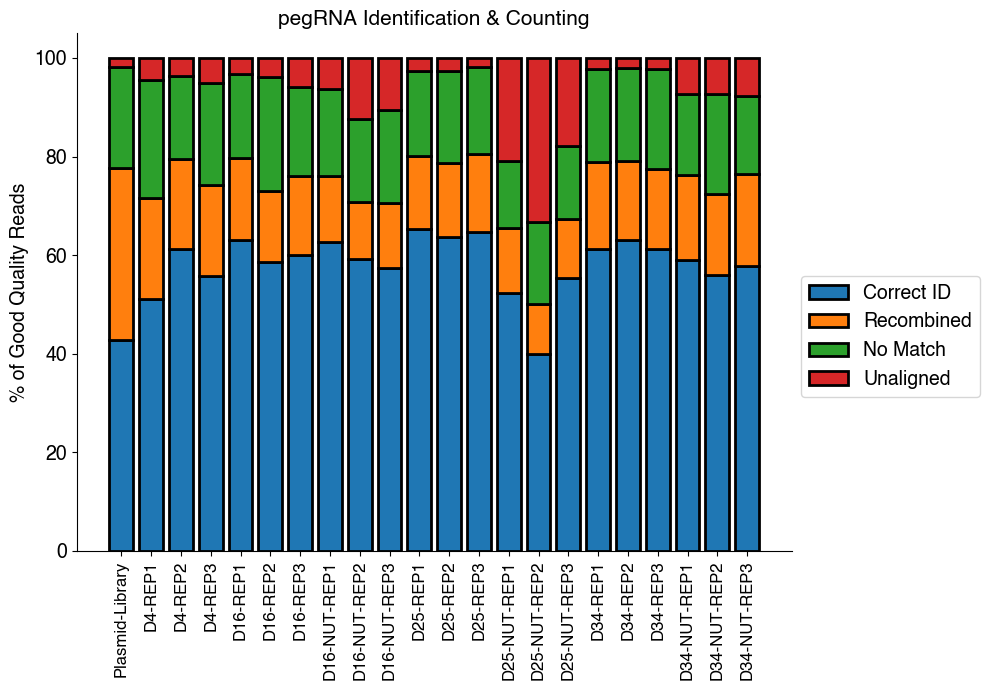

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(samples, c_perc, label='Correct ID', linewidth=2, edgecolor='black')
ax.bar(samples, d_perc,bottom=c_perc, label="Recombined", linewidth=2, edgecolor='black')
ax.bar(samples, nm_perc,bottom=np.array(c_perc) + np.array(d_perc), label="No Match", linewidth=2, edgecolor='black')
ax.bar(samples, un_perc,bottom=np.array(c_perc) + np.array(d_perc) + np.array(nm_perc), label="Unaligned", linewidth=2, edgecolor='black')
#ax.bar(samples, l_perc,bottom=np.array(c_perc) + np.array(d_perc) + np.array(nm_perc) + np.array(un_perc), label="Low Quality", linewidth=2, edgecolor='black')

ax.legend(fontsize=14,bbox_to_anchor=(1, .55))

ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("% of Good Quality Reads", fontsize=14);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('pegRNA Identification & Counting', fontsize=15)
fig.tight_layout()

## Extended Data Figure 2d

Count of correctly identified pegRNAs in each replicate and time-point.

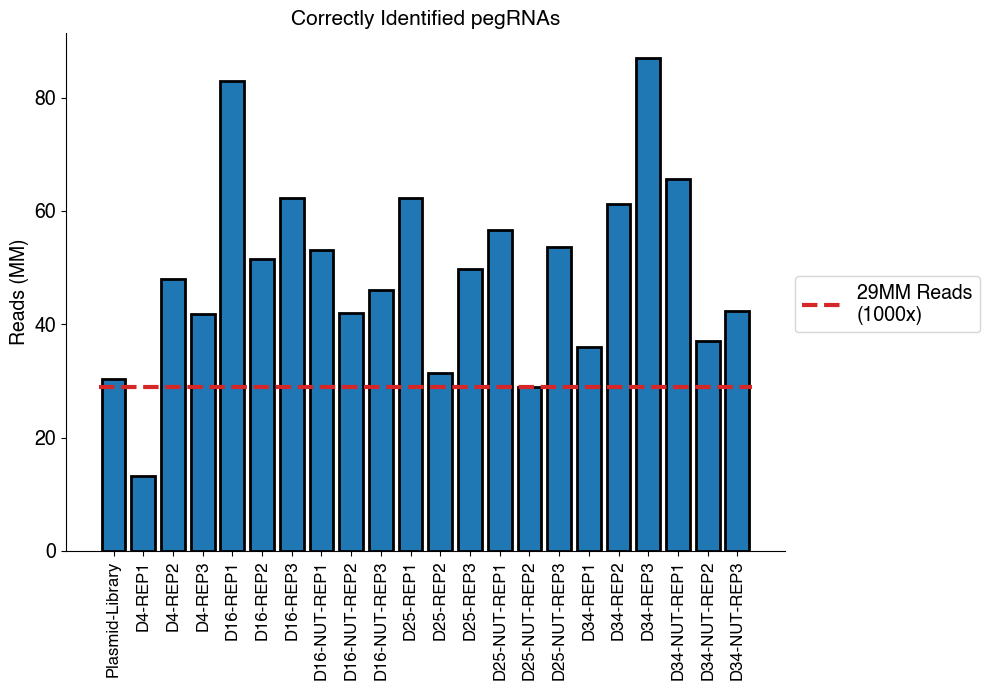

In [35]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(samples, corr_id_total,  linewidth=2, edgecolor='black')
ax.plot([0-.5,len(samples)-.5], [29e6, 29e6], c='tab:red', linestyle='dashed', linewidth=3, label='29MM Reads\n(1000x)')

plt.legend(fontsize=14,bbox_to_anchor=(1, .55))
ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("Reads (MM)", fontsize=14);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticklabels([0,20,40,60,80])
ax.set_title('Correctly Identified pegRNAs', fontsize=15)
fig.tight_layout()

## Extended Data Figure 2e
Extraction of the sensor locus from reads with correctly identified pegRNAs. Extracted sensor = sensor read matches pegRNA identification and is thus extracted and saved. Recombined = sensor read does not match pegRNA (discarded). Unaligned = no polyT-tevopreQ1 sequence found.

In [99]:
# and also looking at recombination rate
peg_extract = []
peg_recombined = []
peg_unalign = []

sum_extract = []
sum_recombined = []
sum_unaligned = []
for x in samples:

    df = count_dict[x]
    df = df[df['total']>0]

    total = np.array(df['total'])
    recomb = np.array(df['recombination'])
    extract = np.array(df['extracted'])
    unaligned = np.array(df['unaligned'])

    sum_extract.append(100*(sum(extract)/sum(total)))
    sum_recombined.append(100*(sum(recomb)/sum(total)))
    sum_unaligned.append(100*(sum(unaligned)/sum(total)))

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_23544/96543164.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samples, rotation=90);


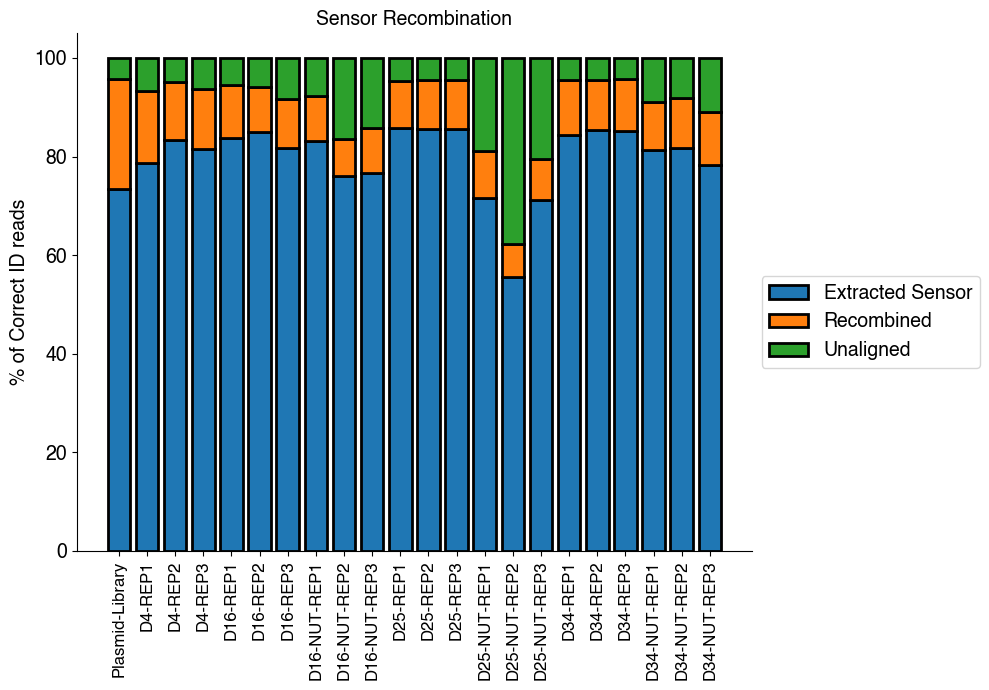

In [100]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(samples, sum_extract, label='Extracted Sensor', linewidth=2, edgecolor='black')
ax.bar(samples, sum_recombined,bottom=sum_extract, label="Recombined", linewidth=2, edgecolor='black')
ax.bar(samples, sum_unaligned,bottom=np.array(sum_extract) + np.array(sum_recombined), label="Unaligned", linewidth=2, edgecolor='black')
#ax.bar(samples, l_perc,bottom=np.array(c_perc) + np.array(d_perc) + np.array(nm_perc) + np.array(un_perc), label="Low Quality", linewidth=2, edgecolor='black')

ax.legend(fontsize=14,bbox_to_anchor=(1, .55))

ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("% of Correct ID reads", fontsize=14);

ax.set_title("Sensor Recombination", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

## Extended Data Figure 2f
Sensor recombination rate as a function of protospacer orientation. When the protospacer is on the positive strand (+) of the sensor (blue), the recombination rate increases compared to when the protospacer is on the negative strand (-) of the sensor. 

In [101]:
p53_full = p53_filtered


plus_total = []
minus_total = []

plus_strand = np.array(p53_full['PAM_strand']=='+')
minus_strand = ~np.array(p53_full['PAM_strand']=='+')

for x in samples:

    df = count_dict[x]
    df['peg_id'] = ['peg_' + str(i) for i in  df['pegRNA_idx']]
    df = df[df['peg_id'].isin(p53_filtered['peg_id'])]

    df_plus = df[plus_strand]
    df_minus = df[minus_strand]

    df_plus = df_plus[df_plus['total']>0]
    df_minus = df_minus[df_minus['total']>0]

    

    total_plus = np.array(df_plus['total'])
    recomb_plus = np.array(df_plus['recombination'])

    total_minus = np.array(df_minus['total'])
    recomb_minus = np.array(df_minus['recombination'])

    plus_total.append(100*(sum(recomb_plus)/sum(total_plus)))
    minus_total.append(100*(sum(recomb_minus)/sum(total_minus)))

plus = pd.DataFrame(dict(zip(["Sample", "PAM orientation", "recombination average"],[samples, ["+"]*len(peg_recombined_plus), plus_total])))
minus =pd.DataFrame(dict(zip(["Sample", "PAM orientation", "recombination average"],[samples, ["–"]*len(peg_recombined_minus), minus_total])))

reco_pam = pd.concat((plus, minus))

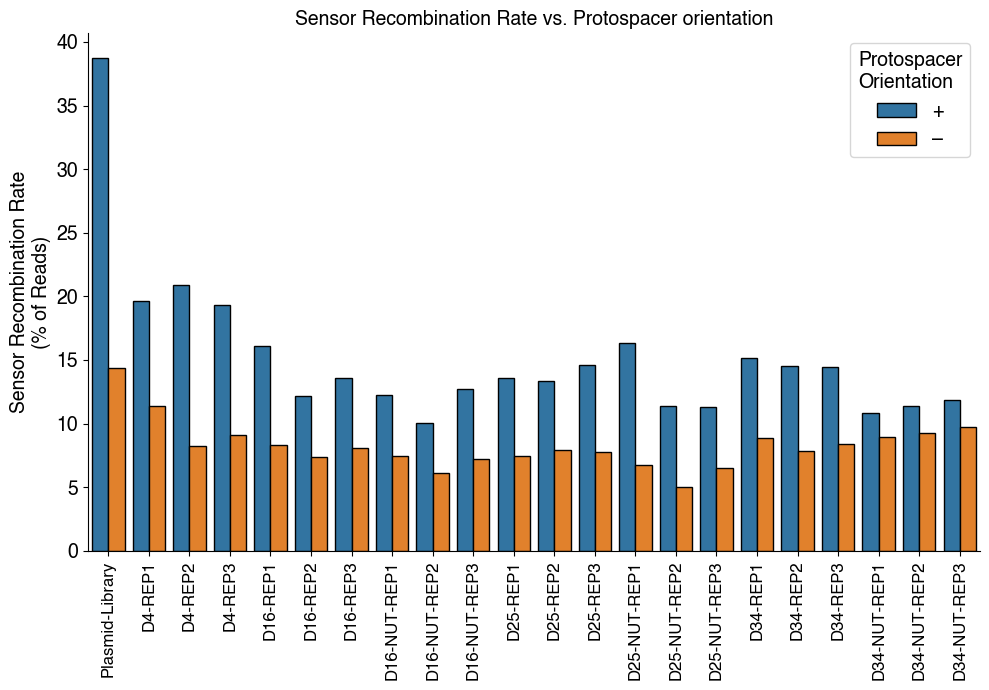

In [111]:

fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(data=reco_pam, x='Sample', y='recombination average', hue='PAM orientation', ax=ax, linewidth=1, edgecolor='black')

ax.legend(title = 'Protospacer\nOrientation', title_fontsize=14, fontsize=14)

ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("Sensor Recombination Rate\n(% of Reads)", fontsize=14);
ax.set_xlabel("", fontsize=14);
ax.set_title("Sensor Recombination Rate vs. Protospacer orientation", fontsize=14);


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

# Extended Data Figure 3 – The TP53 prime editing sensor screen is highly reproducible with low indel rates.
## Extended Data Figure 3a
Pearson correlation in raw pegRNA counts among each replicate and time-point. Plasmid = plasmid library. 

In [37]:
raw_counts = pd.read_csv('counts_merged/raw_counts.csv')

order = ['D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

raw = raw_counts[order]

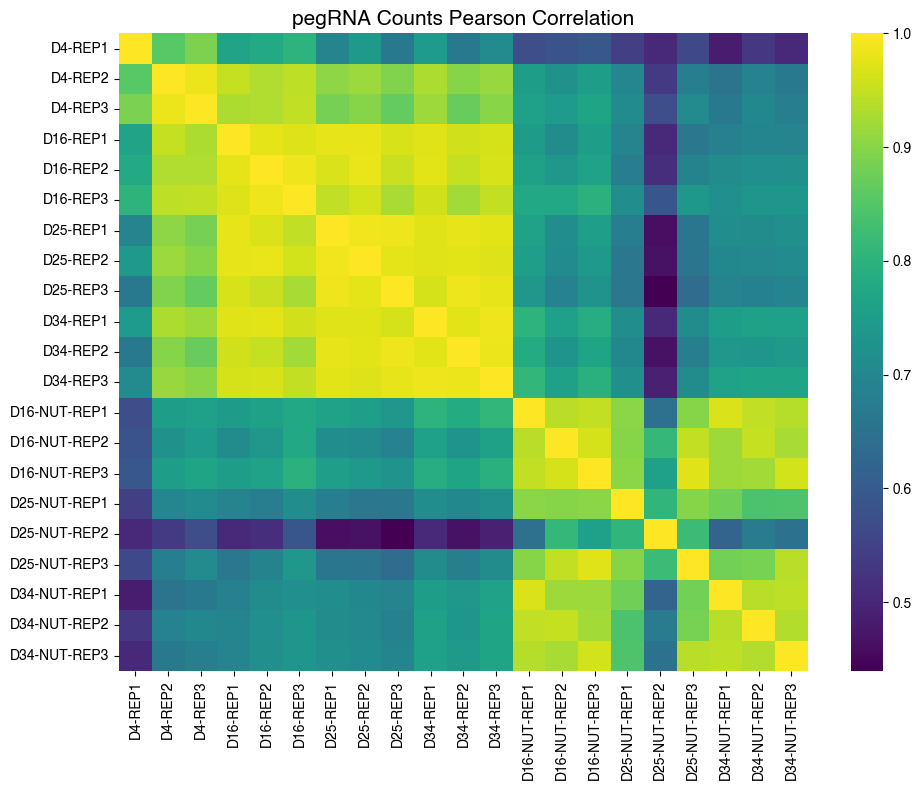

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(raw.corr(method='pearson'), cmap='viridis')
ax.set_title('pegRNA Counts Pearson Correlation', fontsize=15)
fig.tight_layout()

## Extended Data Figure 3b
Spearman correlation in sensor correct editing percentage among each replicate and time-point for pegRNAs with at least 10 sensor reads.

In [41]:
samples = ['D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

crispresso = os.listdir("crispresso/compact_filtered_background_subtracted")

reorder = []
for i in samples:
    for k in crispresso:
        if i in k:
            df = pd.read_csv(f"crispresso/compact_filtered_background_subtracted/{k}")
            reorder.append(df)


cp_dict = dict(zip(samples, reorder))

In [42]:
cps = []
for x in samples: 
    df = cp_dict[x]
    cp = df['corr_perc_backsub']
    cps.append(cp)

c = pd.DataFrame(dict(zip(samples, cps)))
c['peg_id'] = cp_dict['D4-REP1']['peg_id']

counts_threshold = 10
pp = []
for x in samples: 
    df = cp_dict[x]
    df = df[df['Reads_aligned_all_amplicons']>=10]
    pegs = df['peg_id']
    pp.append(pegs)

inter = list(set.intersection(*map(set,pp)))

c_thresh = c[c['peg_id'].isin(inter)]

order = ['D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']
cord = c[order].corr(method='spearman')

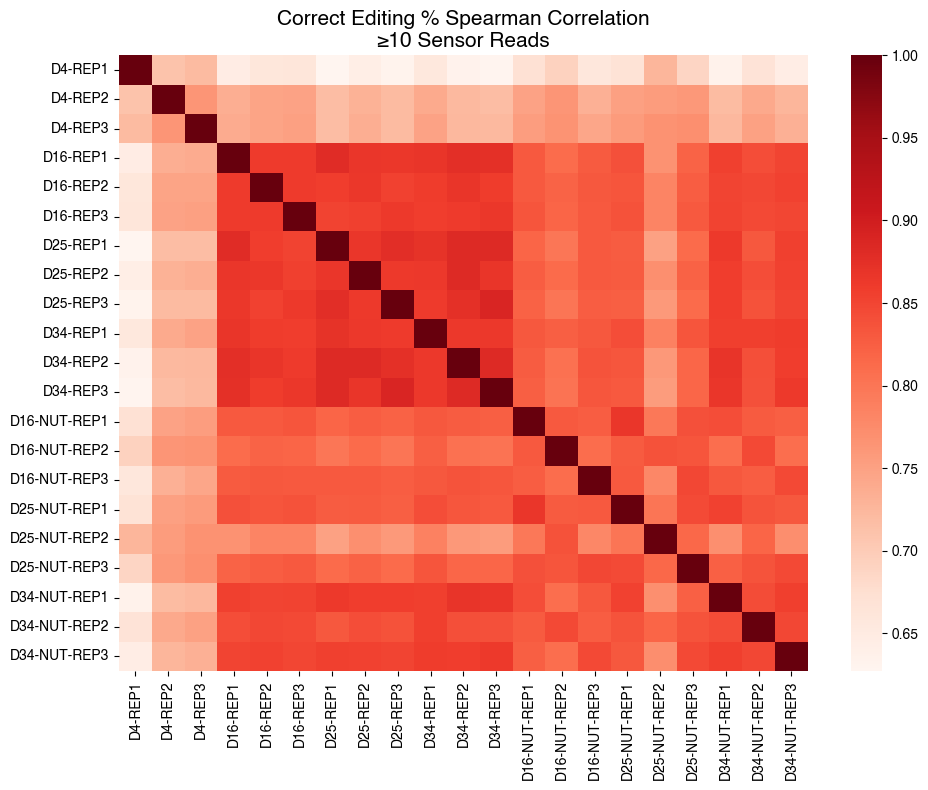

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cord, cmap='Reds')
ax.set_title('Correct Editing % Spearman Correlation\n≥10 Sensor Reads', fontsize=15)
fig.tight_layout()

## Extended Data Figure 3c
Median indel percentage among active pegRNAs (≥1% editing) for each time-point and condition.

In [40]:
avgs = []
indels = []
total_indel = []
byprod = []
WT1 = []
count_threshold=10

#calculating oveall average
for x in samples:
    df = cp_dict[x]
    #df = df[df['peg_id'].isin(snps)]
    fil = df[df['Reads_aligned_all_amplicons']>=count_threshold]
    fil = fil[fil['corr_perc_backsub']>=1]
    avg = np.median(fil['corr_perc_backsub'])
    avg2 = np.median(fil['INDEL_perc_backsub'])
    avg3 = np.median(fil['byprod_perc_backsub'])
    avg4 = np.median(fil['WT_perc_backsub'])

    total_indel.append(np.array(fil['INDEL_perc_backsub']))
    avgs.append(avg)
    indels.append(avg2)
    byprod.append(avg3)
    WT1.append(avg4)

    #calculating max efficiency pegRNA per variant

conditions = [i[:-5] for i in samples]
nutlin = []
for i in conditions:
    if 'NUT' in i:
        nutlin.append('Nutlin')
    else:
        nutlin.append('WT')

df_perc = pd.DataFrame(dict(zip(['Sample', 'Condition', 'Nutlin', 'Correct % Median', 'Indel % Median', 'Byproduct % Median', 'WT% Median'], [samples, conditions, nutlin, avgs, indels, byprod, WT1])))

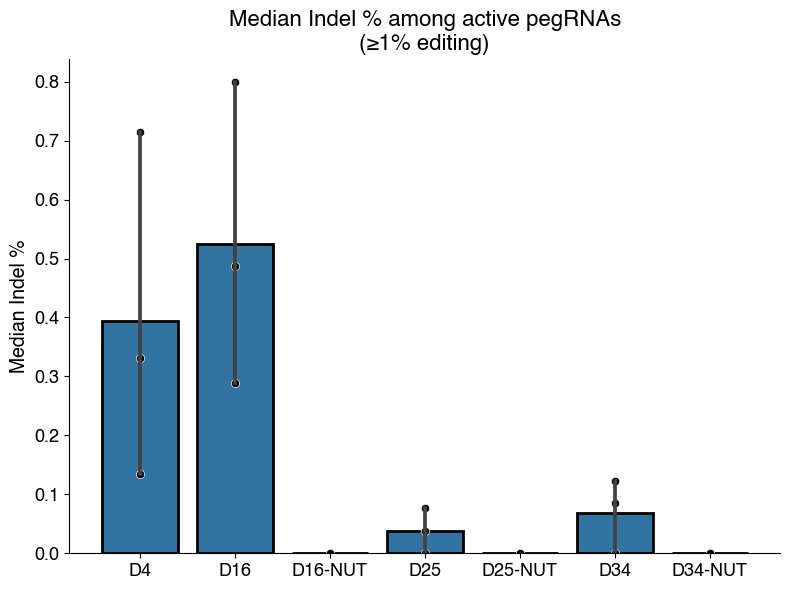

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8,6), sharey=True)

colors = ['tab:blue', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red']

g2 = sns.barplot(data = df_perc, x='Condition', y='Indel % Median', ax=ax, linewidth=2, edgecolor='black', palette=colors)

g2 = sns.scatterplot(data = df_perc, x='Condition', y='Indel % Median', ax=ax, color='black')

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_ylabel("Median Indel %", fontsize=14)
ax.set_title("Median Indel % among active pegRNAs\n(≥1% editing)", fontsize=16)


ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('')
fig.tight_layout()

## Extended Data Figure 3d
Boxplot of indel frequency among active pegRNAs (≥1% editing) for each replicate and time-point. Lower quartile = 0% for all replicates (not visible). 


In [43]:
concaters = []
for i, val in enumerate(total_indel):
    nombre = samples[i]
    n_list = [nombre]*len(val)
    d = pd.DataFrame(dict(zip(['Condition', 'Indel%'], [n_list, val])))
    concaters.append(d)

df_combined_indel = pd.concat(concaters)

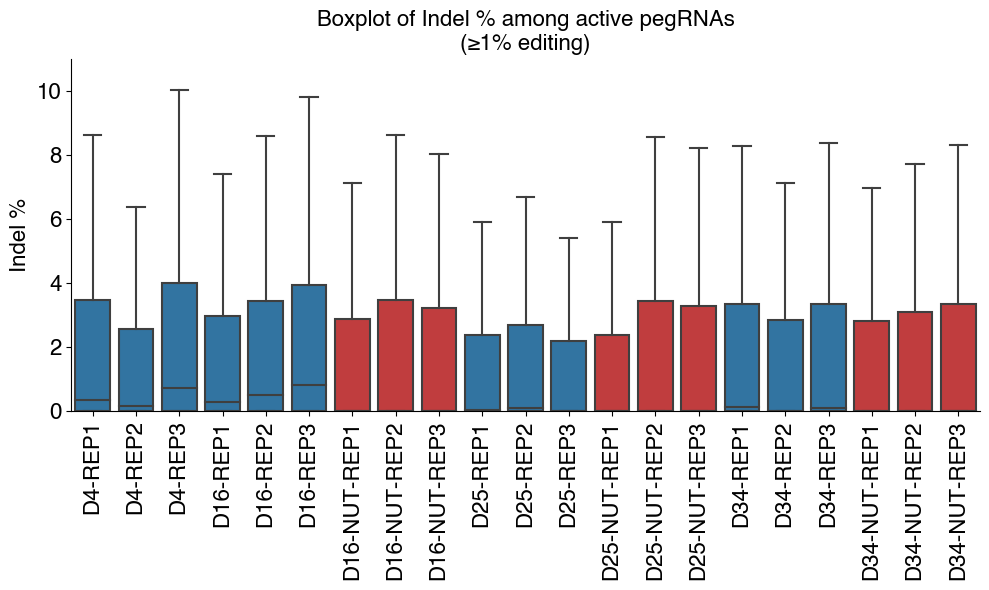

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue','tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:blue','tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:blue','tab:red', 'tab:red', 'tab:red']

g = sns.boxplot(data = df_combined_indel, x='Condition', y='Indel%', showfliers=False, palette=colors)
ax.set_ylim(0,11)

ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_ylabel("Indel %", fontsize=16)
ax.set_title("Boxplot of Indel % among active pegRNAs\n(≥1% editing)", fontsize=16)

ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('')

for i, tick_label in enumerate(g.axes.get_xticklabels()):

    tick_label.set_rotation(90)

fig.tight_layout()

## Extended Data Figure 3e

Histogram of pegRNA editing efficiency in the Nutlin-treated Day 34 samples.

In [44]:
# reading in MERGED correct editing percentages
# this is just adding the outcomes of different replicates to improve sample size

#reading in correct editing percentages
#loading in the merged replicates to boost confidence on sensor
fp = "crispresso_replicates_merged"

reorder = []

conditions = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']

for i in conditions:
    df = pd.read_csv(f"{fp}/{i}_reps_combined.csv")
    df['peg_id'] = p53_filtered['peg_id']
    reorder.append(df)

cp_dict2 = dict(zip(conditions, reorder))

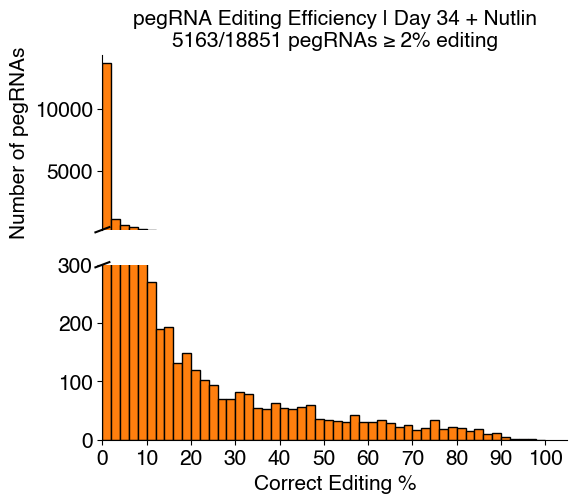

In [88]:
#histogram
#for x in samples[1:]:
x = 'D34-NUT'
df = cp_dict2[x]
count_threshold = 10
fil = df[df['Reads_aligned_all_amplicons']>=count_threshold]

cp = np.array(fil['corr_perc_backsub'])

over5 = sum(cp>=2)
totalvars = len(cp)


f, (ax, ax2) = plt.subplots(2, 1, figsize=(6,5), sharex=True)

ax.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', color='tab:orange', linewidth=1);
ax2.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', color='tab:orange',linewidth=1);


ax.set_xlim(0,)
ax.set_ylim(300,)
ax2.set_ylim(0,300)


ax.set_title(f"pegRNA Editing Efficiency | Day 34 + Nutlin\n{over5}/{totalvars} pegRNAs ≥ 2% editing", fontsize=15)
ax.set_ylabel('Number of pegRNAs', fontsize=15)
ax2.set_xlabel("Correct Editing %", fontsize=15)
ax.tick_params(axis='both', which='major', bottom=False, labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.tick_params(labeltop=False)

ax.set_xticks(np.linspace(0,100,11));

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal


## Extended Data Figure 3f

Histogram of pegRNA editing efficiency of the most efficient pegRNA for each variant in the Nutlin-treated Day 34 samples.

In [73]:
#and histogram of most efficient pegRNAs per variant
bb = p53_filtered.copy()

sample = 'D34'
d34 = cp_dict2[sample]

counts_threshold = 10
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]

merged = pd.merge(bb, d34, on='peg_id')
uniq_idx = list(np.unique(merged['variant_index']))

i_maxs = []
for idx in uniq_idx:
    sub = merged[merged['variant_index']==idx]
    i_max = sub['corr_perc_backsub'].idxmax()
    i_maxs.append(i_max)


merged = merged.iloc[i_maxs]

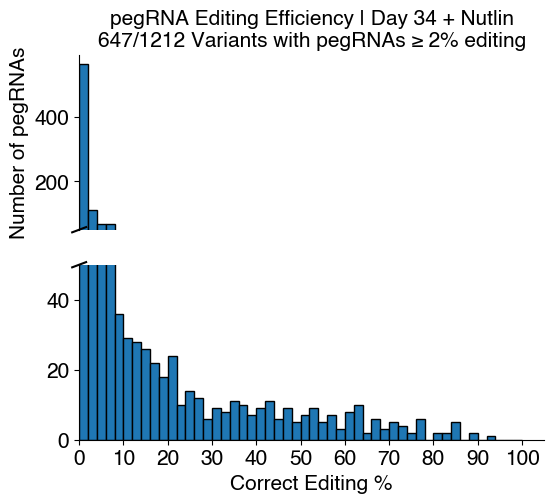

In [90]:
#histogram
#for x in samples[1:]:
cp = np.array(merged['corr_perc_backsub'])

over5 = sum(cp>=2)
totalvars = len(cp)


f, (ax, ax2) = plt.subplots(2, 1, figsize=(6,5), sharex=True)

ax.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1);
ax2.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1);


ax.set_xlim(0,)
ax.set_ylim(50,)
ax2.set_ylim(0,50)


ax.set_title(f"pegRNA Editing Efficiency | Day 34 + Nutlin\n{over5}/{totalvars} Variants with pegRNAs ≥ 2% editing", fontsize=15)
ax.set_ylabel('Number of pegRNAs', fontsize=15)
ax2.set_xlabel("Correct Editing %", fontsize=15)
ax.tick_params(axis='both', which='major', bottom=False, labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.tick_params(labeltop=False)

ax2.set_xticks(np.linspace(0,100,11));


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal


## Extended Data Figure 3g

Comaparitive PDF of all pegRNAs and the most efficient pegRNA for each variant.

(0.0, 105.0)

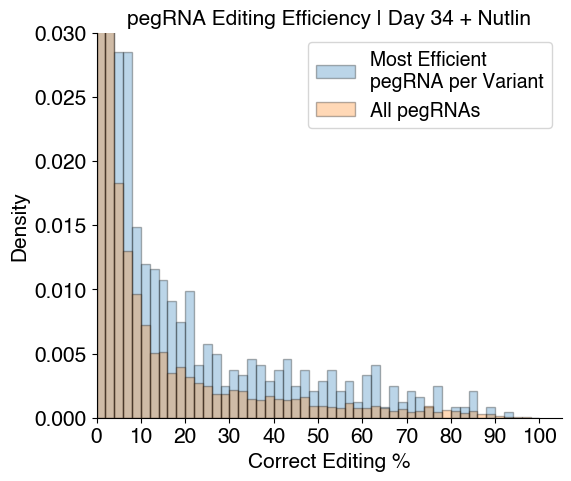

In [92]:
cp = np.array(fil['corr_perc_backsub'])
cp2 = np.array(merged['corr_perc_backsub'])


fig, ax = plt.subplots(figsize=(6,5))

ax.hist(cp2, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1, density=True, alpha=.3, label='Most Efficient\npegRNA per Variant');
ax.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1, density=True, alpha=.3, label='All pegRNAs');

ax.legend(fontsize=14)

ax.set_title(f"pegRNA Editing Efficiency | Day 34 + Nutlin", fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel("Correct Editing %", fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.linspace(0,100,11));

ax.set_ylim(0,.03)
ax.set_xlim(0,)

# Extended Data Figure 4 – Training a random forest regressor to predict pegRNA efficiency.
## Extended Data Figure 4a
A random forest regressor was trained on a restricted set of pegRNA features using 70% of the variants in the untreated condition of Day 16 replicate 1. There was no overlap between the variants used for training and testing. The performance on the held-out test set is shown (spearman correlation = 0.61). 

**Note: the exact correlation values will vary depending the model training run

In [45]:
x = 'D16-REP1'
df = cp_dict[x] #see code above (Figure 2a for cp_dict assignment)

counts_threshold=100

#choose a particular variant type if desired
var_types = ['SNV', 'INS', 'DEL', 'ONV'] #['SNP']

chosen = list(p53_filtered[p53_filtered['variant_type'].isin(var_types)]['peg_id'])
df = df[df['peg_id'].isin(chosen)]

df = df[df['Reads_aligned_all_amplicons']>=counts_threshold]

p53_subset = p53_filtered[p53_filtered['peg_id'].isin(list(df['peg_id']))]

#would be easier to just merge these dataframes (functionally the same when indexing is identical like this though)
assert list(p53_subset['peg_id'])==list(df['peg_id']) #ensure indexing is correct

b = p53_subset

In [46]:
#training of the model
from sklearn.ensemble import RandomForestRegressor # for building the model

def model_training():
    #converting PAM sequences and variant types to integers for training
    PAM_dict = {"AGG":0, 'GGG':1, 'CGG':2, 'TGG':3}
    num_PAM = [PAM_dict[k] for k in b['PAM']]
    b['num_PAM'] = num_PAM

    var_dict = {"SNV":0, 'INS':1, 'DEL':2, 'ONV':3}
    num_var = [var_dict[k] for k in b['variant_type']]
    b['var_type'] = num_var

    #adding in correct percentage
    b['corr_perc'] = df['corr_perc_backsub']

    #train, test splitting; ensuring same variant isn't in train and test
    uniq_DNA = np.unique(b['HGVSc'])
    perc_train = .7
    num_train = int(perc_train*len(uniq_DNA))

    train_set = list(np.random.choice(uniq_DNA, size=num_train, replace=False))

    train = b[b['HGVSc'].isin(train_set)]
    test =b[~b['HGVSc'].isin(train_set)]

    X_train = np.array(train[["PBS_length", "Doench16_Azimuth_percentile", "PBS_GC_content", "homology_overhang","distance_to_nick", "RTT_length", "num_PAM", "var_type"]])
    Y_train = np.array(train[["corr_perc"]])

    X_test = np.array(test[["PBS_length", "Doench16_Azimuth_percentile", "PBS_GC_content", "homology_overhang","distance_to_nick", "RTT_length", "num_PAM", "var_type"]])
    Y_test = np.array(test[["corr_perc"]])


    # Initializing the Random Forest Regression model with 10 decision trees
    model = RandomForestRegressor(n_estimators = 1000, random_state = 0)

    # Fitting the Random Forest Regression model to the data
    model.fit(X_train, Y_train)

    return model, X_test, Y_test, test, train

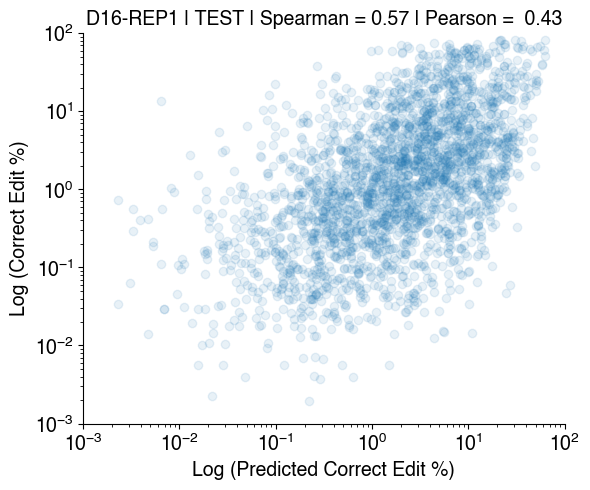

In [51]:
#note: precise values of spearman correlation will vary based on training run
#models can be saved for use with pickle model
model, X_test, Y_test, test, train = model_training()

y_pred = model.predict(X_test)


#----and plotting-------

fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(y_pred, Y_test,alpha=.1)
plt.yscale("log")
plt.xscale("log")
plt.ylim(.001,100)
plt.xlim(.001,100)

plt.ylabel("Log (Correct Edit %)", fontsize=14)
plt.xlabel("Log (Predicted Correct Edit %)", fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

jj = scipy.stats.spearmanr(y_pred, Y_test)
j2 = jj.statistic

jj2 = scipy.stats.pearsonr(y_pred, Y_test)
j3 = jj2.statistic

ax.set_title(f'{x} | TEST | Spearman = {np.round(j2, 2)} | Pearson =  {np.round(j3[0], 2)}', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

## Additional Analysis

PEGG Score vs. RF score correlation.

Text(0, 0.5, 'RF Score')

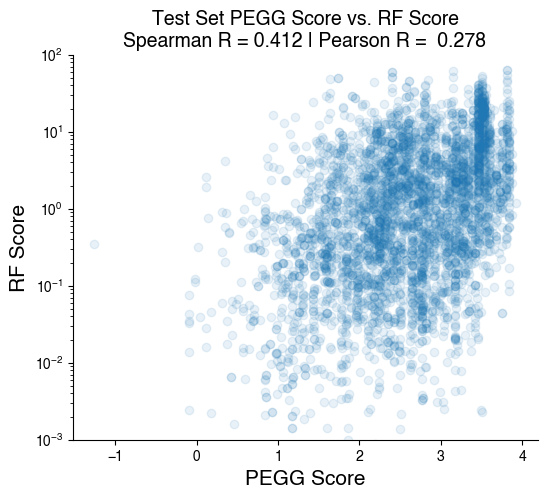

In [52]:
spear = np.round(scipy.stats.spearmanr(test['PEGG_score'], y_pred).statistic, 3)
pear = np.round(scipy.stats.pearsonr(test['PEGG_score'], y_pred).statistic,3)

fig, ax = plt.subplots(figsize=(6,5))
x = test['PEGG_score']
y = y_pred
ax.scatter(x,y, alpha=.1)

ax.set_title(f'Test Set PEGG Score vs. RF Score\nSpearman R = {spear} | Pearson R =  {pear}', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yscale("log")
#plt.xscale("log")
plt.ylim(.001,100)
ax.set_xlabel('PEGG Score', fontsize=15)
ax.set_ylabel('RF Score', fontsize=15)

## Extended Data Figure 4b
Assessment of the performance of the random forest regressor in predicting editing activity at each time-point. Again, only variants in the test set are considered. Each dot represents a separate replicate. Spearman correlation between predicted and actual editing is shown in blue, pearson correlation in gray. 


**Note: Requires that you run the cells above (Fig 4a)

In [242]:
#train-test split
#b refers to D16-REP1 above
def rf_format(df, test):
    """ 
    Takes in dataframe + HGVScs to test (to avoid testing on training set)
    produces arrays in correct format for testing
    """
    count_threshold=100

    df = df[df['Reads_aligned_all_amplicons']>=count_threshold]

    p53_subset = p53_filtered[p53_filtered['peg_id'].isin(list(df['peg_id']))]

    assert list(p53_subset['peg_id'])==list(df['peg_id']) #ensure indexing is correct

    b2 = p53_subset

    PAM_dict = {"AGG":0, 'GGG':1, 'CGG':2, 'TGG':3}
    num_PAM = [PAM_dict[k] for k in b2['PAM']]
    b2['num_PAM'] = num_PAM

    var_dict = {"SNV":0, 'INS':1, 'DEL':2, 'ONV':3}
    num_var = [var_dict[k] for k in b2['variant_type']]
    b2['var_type'] = num_var

    #adding in correct percentage
    b2['corr_perc'] = df['corr_perc_backsub']

    #selecting just the appropriate subset
    b2 =b2[b2['peg_id'].isin(list(test['peg_id']))]

    X = np.array(b2[["PBS_length", "Doench16_Azimuth_percentile", "PBS_GC_content", "homology_overhang","distance_to_nick", "RTT_length", "num_PAM", "var_type"]])
    Y = np.array(b2[["corr_perc"]])

    return X, Y

In [243]:
s = []
p = []
for x in samples[1:]:

    df = cp_dict[x]
    x,y = rf_format(df, test)

    y_pred = model.predict(x)

    jj = scipy.stats.spearmanr(y_pred, y)
    j2 = jj.statistic
    s.append(j2)
    p.append(scipy.stats.pearsonr(y_pred, y).statistic[0])

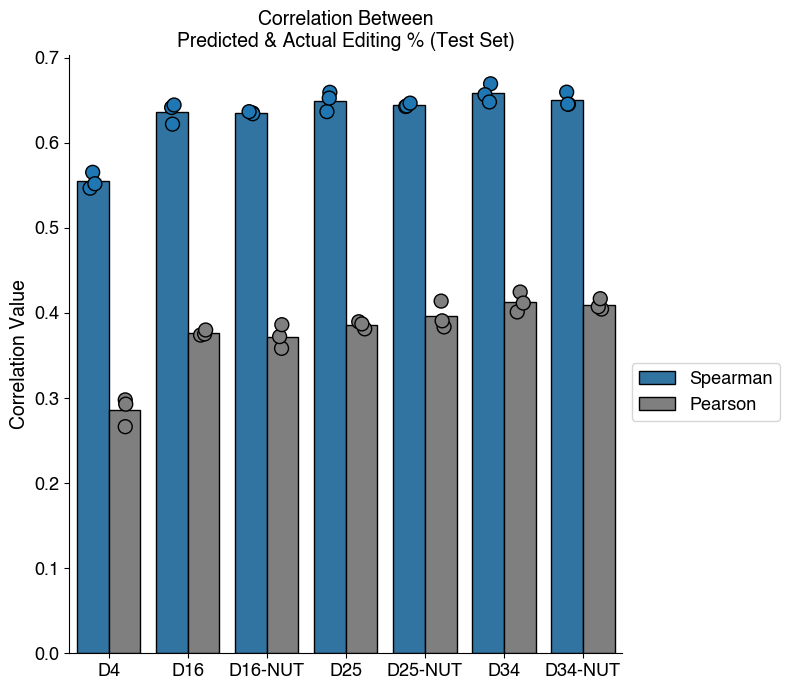

In [248]:
a = pd.DataFrame(dict(zip(['sample', 'condition', 'Correlation type', 'Value'], [samples[1:], conditions, ['Spearman']*len(conditions), s])))
b = pd.DataFrame(dict(zip(['sample', 'condition', 'Correlation type', 'Value'], [samples[1:], conditions, ['Pearson']*len(conditions), p])))
rf = pd.concat((a,b))

fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=rf, x='condition', y='Value', hue='Correlation type', ax=ax, linewidth=1, edgecolor='black', errorbar=None, palette=['tab:blue', 'tab:grey'])

g = sns.stripplot(data=rf, x='condition', y='Value', hue='Correlation type', ax=ax, size=10, linewidth=1, edgecolor='black', dodge=True, legend=False, palette=['tab:blue', 'tab:grey'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=13, bbox_to_anchor=(1,.5))
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_ylabel("Correlation Value", fontsize=14)
ax.set_xlabel("")
ax.set_title('Correlation Between\nPredicted & Actual Editing % (Test Set)', fontsize=14)
fig.tight_layout()

# Extended Data Figure 5 – Correlation in pegRNA LFC among conditions and time-points. 

Each panel is a density plot of the LFC in pegRNAs at each time-point/condition (i.e. x-axis = LFC of the pegRNAs corresponding with that column’s sample, and y-axis = LFC of the pegRNAs corresponding with that row’s samples). Replicates were merged using MAGeCK to generate a single (median) LFC for each pegRNA at each time-point. Rs = spearman correlation. 


In [51]:
samps = ['D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']

#reading in mageck
fp = './MAGeCK analysis'
files = os.listdir(fp)
files = sorted([f for f in files if f[-3:]=='txt'])

dfs = []
for i,f in enumerate(files):
    df = pd.read_csv(fp + '/' + f, sep='\t')

    #ensure naming is correct
    assert f[:3]==samps[i][:3]

    #reorder the pegs...
    df = df.rename(columns = {'sgrna':'peg_id'})
    df_merge = pd.merge(p53_filtered, df, how='left', on='peg_id')

    #also add in merge of cp_dict?

    dfs.append(df_merge)


#perform thresholding of control_mean counts (filtering out pegRNAs with below 10 control counts mean)
#differences in counts because of normalization
#going to do it for one and apply it to all...

control_mean_threshold = 10

#d16
dd = dfs[0]
dd = dd[dd['control_mean']>=control_mean_threshold]
pegs_above_thres = dd['peg_id']

dfs2 = []
for i in dfs:
    dfs2.append(i[i['peg_id'].isin(pegs_above_thres)])


assert list(dfs2[0]['peg_id']) == list(dfs2[1]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[2]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[3]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[4]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[5]['peg_id']) 

mageck_dict = dict(zip(samps, dfs2))

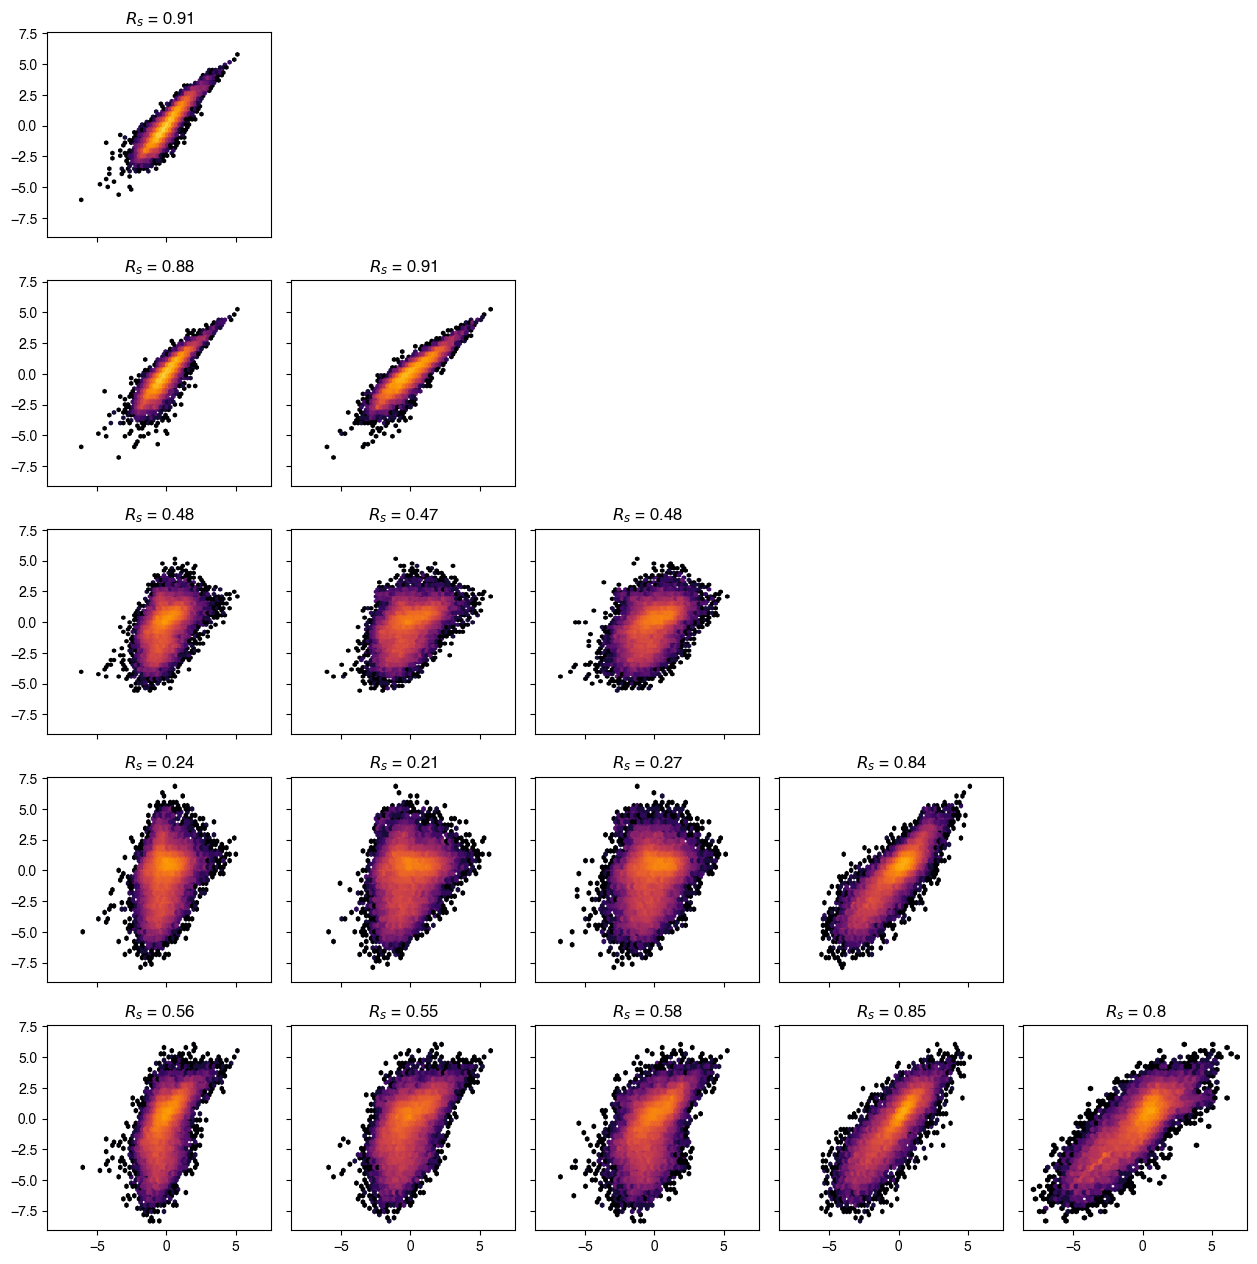

In [57]:

labels = ['D16', 'D25', 'D34', 'D16-NUT', 'D25-NUT', 'D34-NUT']

fig, ax1 = plt.subplots(6,6,sharex=True, sharey=True, figsize=(15,15))

peg_dict = mageck_dict
for i, val in enumerate(labels):
    x=peg_dict[val]['LFC']
    for i2, val2 in enumerate(labels):
        y=peg_dict[val2]['LFC']

        hb = ax1[i][i2].hexbin(y, x, gridsize=50, bins='log', cmap='inferno', vmax=1e3)
        s1 = scipy.stats.spearmanr(x,y).statistic
        ax1[i][i2].set_title('$R_{s}$ = ' + str(np.round(s1,2)))

for i in range(6):
    for k in range(6):
        if k>=i:
            fig.delaxes(ax1[i][k])

fig.tight_layout()

# Extended Data Figure 6 – Filtration of screening data by sensor editing efficiency. 
## Extended Data Figure 6a-d

The LFC of a, pegRNAs ≥ 20% editing b, pegRNAs ≥ 30% editing c, pegRNAs ≥ 40% editing d, pegRNAs ≥ 50% editing, with at least 10 sensor reads at Day 34 relative to Day 4 in the Nutlin-treated condition, with pegRNAs colored by editing efficiency (left) and colored by variant type (right). Selected enriching pegRNAs with FDR < .05 labeled and depleting pegRNAs with FDR < .05 labeled. Blue = SNV, Green = INS, Purple = DEL, Gray = Silent.

**Note: Not each plot is reproduced here. However, by simply modifying the correct_perc_min parameter, the thresholds for including a pegRNA in the plot can be modified, and the output generated.


In [14]:
# first read in MAGEcK data + correct editing data for each pegRNA
#reading the MAGeCK results into a dictionary
#and also reading in information about correct editing percentage

#loading in the data
p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')


#loading in the merged replicates to boost confidence on sensor
fp = "crispresso_replicates_merged"
reorder = []
conditions = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']
for i in conditions:
    df = pd.read_csv(f"{fp}/{i}_reps_combined.csv")
    df['peg_id'] = p53_filtered['peg_id']
    reorder.append(df)

cp_dict2 = dict(zip(conditions, reorder))
samps = list(cp_dict2.keys())[1:]


#reading in mageck
fp = './MAGeCK analysis'
files = os.listdir(fp)
files = sorted([f for f in files if f[-3:]=='txt'])

dfs = []
for i,f in enumerate(files):
    df = pd.read_csv(fp + '/' + f, sep='\t')

    #ensure naming is correct
    assert f[:3]==samps[i][:3]

    #reorder the pegs...
    df = df.rename(columns = {'sgrna':'peg_id'})
    df_merge = pd.merge(p53_filtered, df, how='left', on='peg_id')

    #also add in merge of cp_dict?

    dfs.append(df_merge)


#perform thresholding of control_mean counts (filtering out pegRNAs with below 10 control counts mean)
#differences in counts because of normalization
#going to do it for one and apply it to all...

control_mean_threshold = 10

#d16
dd = dfs[0]
dd = dd[dd['control_mean']>=control_mean_threshold]
pegs_above_thres = dd['peg_id']

dfs2 = []
for i in dfs:
    dfs2.append(i[i['peg_id'].isin(pegs_above_thres)])


assert list(dfs2[0]['peg_id']) == list(dfs2[1]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[2]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[3]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[4]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[5]['peg_id']) 

mageck_dict = dict(zip(samps, dfs2))

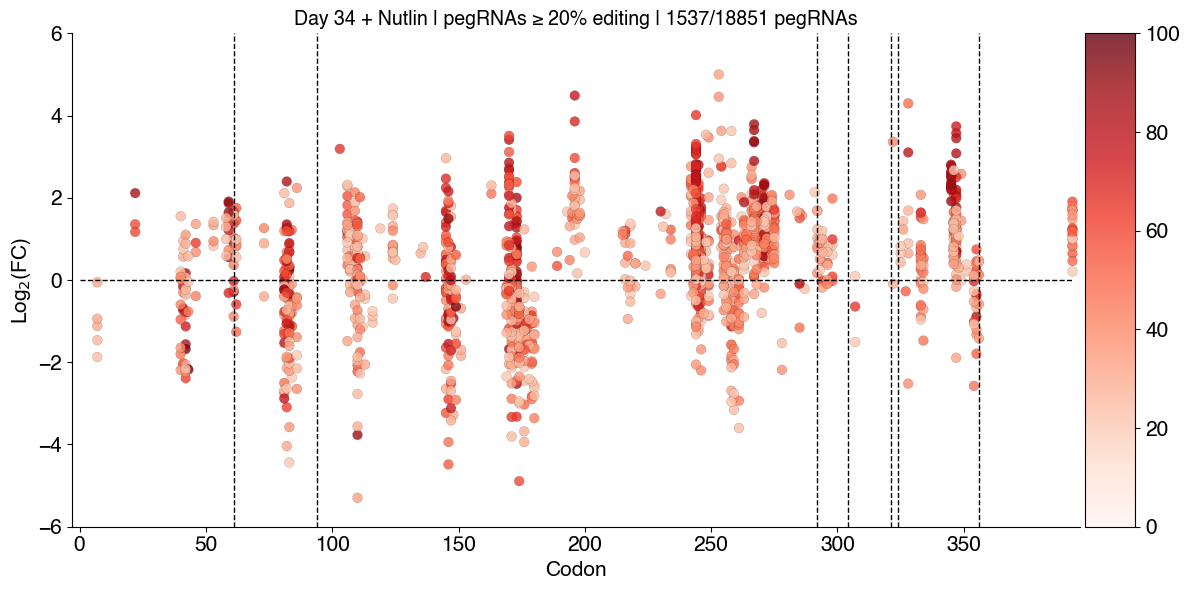

In [28]:
sample = 'D34-NUT'
corr_perc_min = 20 #MODIFY THIS PARAMETER TO GENERATE ALTERNATE PLOTS
corr_perc_max = 100

counts_threshold=10

fig, ax = plt.subplots(figsize=(12,6))

bb = mageck_dict[sample].copy()
bb = bb.replace(0,1e-5) #for the log FDR calculation
bb['-log10(FDR)']=-np.log10(bb['FDR'])
bb['FDR_below_.05'] = bb['FDR']<.05

d34 = cp_dict2[sample]
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]
p = d34[(d34['corr_perc_backsub']>=corr_perc_min) & (d34['corr_perc_backsub']<=corr_perc_max)]

bb = pd.merge(bb, p, on='peg_id')


g = ax.scatter(data = bb, x='codon', y='LFC', c='corr_perc_backsub', cmap='Reds', vmin=0, vmax=100, alpha=.8, s=50, edgecolor='black', linewidths=.1)
#plt.colorbar()

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


fig.colorbar(g, cax=cax, orientation='vertical')

ax.plot([0,393],[0,0], linewidth=1, linestyle='dashed', color='black')
ax.set_title(f"Day 34 + Nutlin | pegRNAs ≥ {corr_perc_min}% editing | {len(bb)}/{len(d34)} pegRNAs", fontsize=14)
ax.set_ylim(-6,6)
ax.set_xlim(-3,396)
ax.set_ylabel("Log$_{2}$(FC)", fontsize=15)
ax.set_xlabel("Codon", fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
cax.tick_params(axis='both', which='major', labelsize=15)


#plotting domain lines

boundaries = [61,94,292,304,321,324,356]
for bound in boundaries:
    ax.plot([bound, bound],[-6,6], linewidth=1, linestyle='dashed', color='black')


fig.tight_layout()

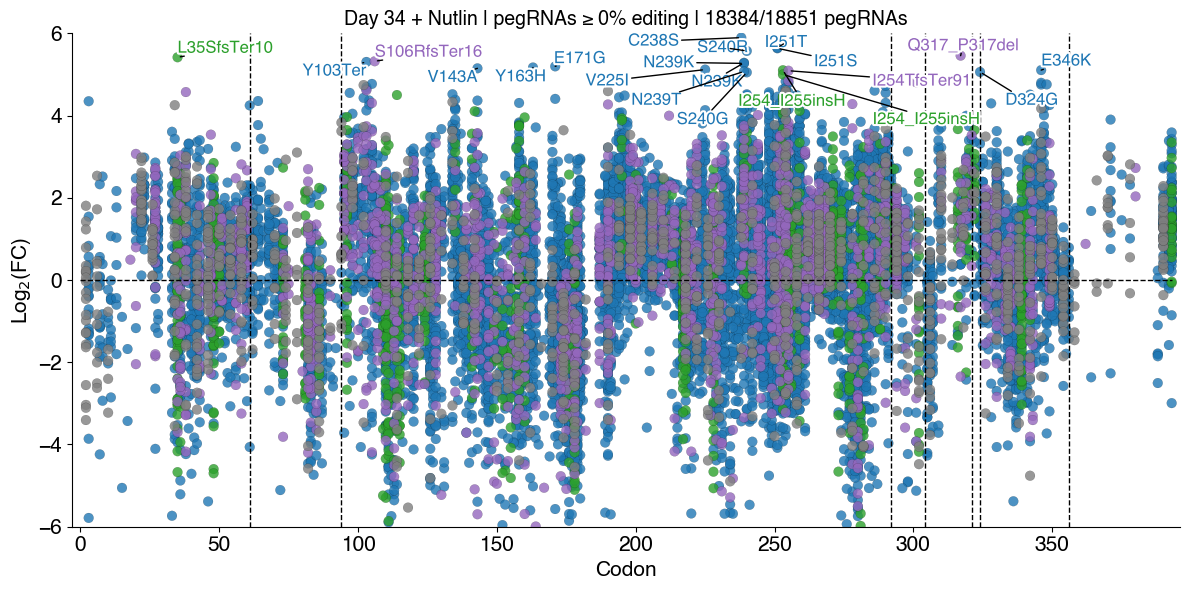

In [29]:
sample = 'D34-NUT'
corr_perc_min = 0 #MODIFY THIS PARAMETER TO GENERATE ALTERNATE PLOTS
corr_perc_max = 100
counts_threshold=10


fig, ax = plt.subplots(figsize=(12,6))

bb = mageck_dict[sample].copy()
bb = bb.replace(0,1e-5) #for the log FDR calculation
bb['-log10(FDR)']=-np.log10(bb['FDR'])
bb['FDR_below_.05'] = bb['FDR']<.05

d34 = cp_dict2[sample]
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]
p = d34[(d34['corr_perc_backsub']>=corr_perc_min) & (d34['corr_perc_backsub']<=corr_perc_max)]

bb = pd.merge(bb, p, on='peg_id')


#c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

#bb['color'] = [c_dict[i] for i in bb['variant_type']]
c_dict = {'SNV':'tab:blue', 'INS':'tab:green', 'DEL':'tab:purple', 'Silent':'tab:grey'}

#coloring based on SNV, INS, DEL, or silent
type_var = []
for i, val in enumerate(bb['variant_type']):
    s = bb['classification'][i]
    if s=='Silent':
        type_var.append('Silent')
    else:
        type_var.append(val)

bb['color'] = [c_dict[i] for i in type_var]

g = ax.scatter(data = bb, x='codon', y='LFC', c='color', alpha=.8, s=50, edgecolor='black', linewidths=.1)
""
ax.plot([0,393],[0,0], linewidth=1, linestyle='dashed', color='black')
ax.set_title(f"Day 34 + Nutlin | pegRNAs ≥ {corr_perc_min}% editing | {len(bb)}/{len(d34)} pegRNAs", fontsize=14)
ax.set_ylim(-6,6)
ax.set_xlim(-3,396)
ax.set_ylabel("Log$_{2}$(FC)", fontsize=15)
ax.set_xlabel("Codon", fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)


#plotting domain lines
boundaries = [61,94,292,304,321,324,356]
for bound in boundaries:
    ax.plot([bound, bound],[-6,6], linewidth=1, linestyle='dashed', color='black')


#pegRNA annotation
#text annotation code
cutoff = 5
min_cutoff = -4

bb2 = bb[bb['LFC']>=cutoff]

t = list(bb2['Gene'])
x=list(bb2['codon'])
y = list(bb2['LFC'])
c = list(bb2['color'])
#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

#c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

texts = [ax.text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,
                                                                                  foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)


adjust_text(texts,only_move={'points':'y', 'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))



fig.tight_layout()
#fig.savefig('ext6a_2.png', dpi=400)

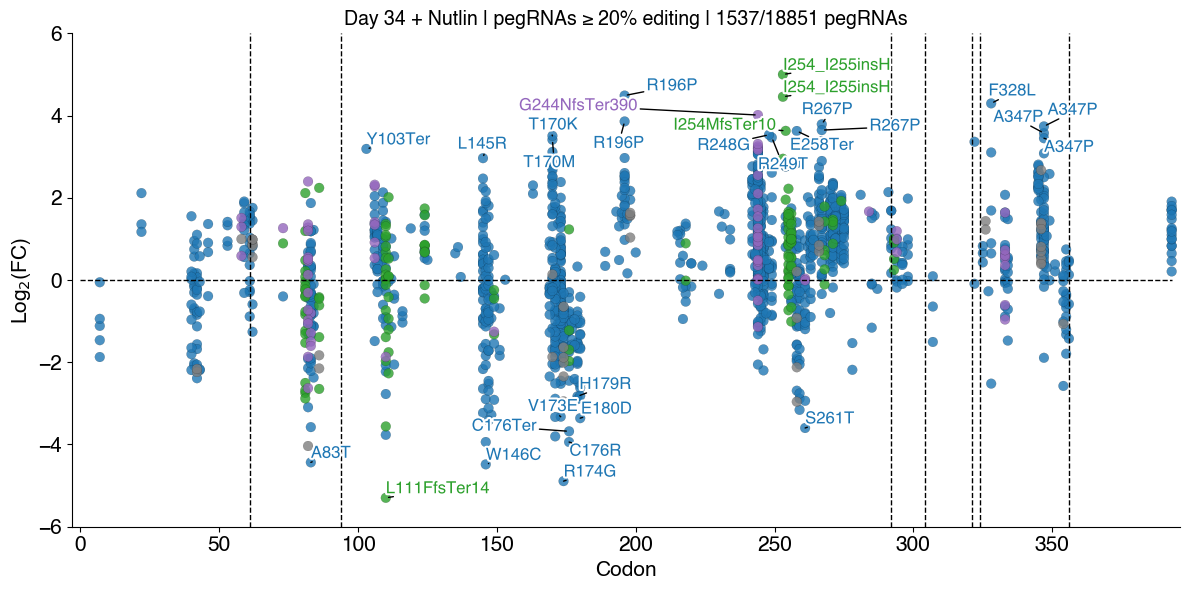

In [33]:
sample = 'D34-NUT'
corr_perc_min = 20 #MODIFY THIS PARAMETER TO GENERATE ALTERNATE PLOTS
corr_perc_max = 100
counts_threshold=10


fig, ax = plt.subplots(figsize=(12,6))

bb = mageck_dict[sample].copy()
bb = bb.replace(0,1e-5) #for the log FDR calculation
bb['-log10(FDR)']=-np.log10(bb['FDR'])
bb['FDR_below_.05'] = bb['FDR']<.05

d34 = cp_dict2[sample]
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]
p = d34[(d34['corr_perc_backsub']>=corr_perc_min) & (d34['corr_perc_backsub']<=corr_perc_max)]

bb = pd.merge(bb, p, on='peg_id')


#c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

#bb['color'] = [c_dict[i] for i in bb['variant_type']]
c_dict = {'SNV':'tab:blue', 'INS':'tab:green', 'DEL':'tab:purple', 'Silent':'tab:grey'}

#coloring based on SNV, INS, DEL, or silent
type_var = []
for i, val in enumerate(bb['variant_type']):
    s = bb['classification'][i]
    if s=='Silent':
        type_var.append('Silent')
    else:
        type_var.append(val)

bb['color'] = [c_dict[i] for i in type_var]

g = ax.scatter(data = bb, x='codon', y='LFC', c='color', alpha=.8, s=50, edgecolor='black', linewidths=.1)
""
ax.plot([0,393],[0,0], linewidth=1, linestyle='dashed', color='black')
ax.set_title(f"Day 34 + Nutlin | pegRNAs ≥ {corr_perc_min}% editing | {len(bb)}/{len(d34)} pegRNAs", fontsize=14)
ax.set_ylim(-6,6)
ax.set_xlim(-3,396)
ax.set_ylabel("Log$_{2}$(FC)", fontsize=15)
ax.set_xlabel("Codon", fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)


#plotting domain lines
boundaries = [61,94,292,304,321,324,356]
for bound in boundaries:
    ax.plot([bound, bound],[-6,6], linewidth=1, linestyle='dashed', color='black')


#pegRNA annotation
#text annotation code
cutoff = 3.4
min_cutoff = -4

bbb1 = bb[bb['LFC']>=cutoff]

bbb2 = bb[bb['LFC']<=-.5]
bbb2 = bbb2[bbb2['FDR_below_.05']==True]

first_half = bb[bb['codon']<=160]
fh1 = first_half[first_half['LFC']>=2.5]

bb2 = pd.concat((bbb1, bbb2, fh1))

t = list(bb2['Gene'])
x=list(bb2['codon'])
y = list(bb2['LFC'])
c = list(bb2['color'])
#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

#c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

texts = [ax.text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,
                                                                                  foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)


adjust_text(texts,only_move={'points':'y', 'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


fig.tight_layout()


# Extended Data Figure 7 – Sensor editing continues over time, independent of selection.


## Extended Data Figure 7a
a, Log2 fold change in pegRNA correct editing percentage relative to Day 4, with pegRNAs split into groups by LFC in pegRNA counts at the final time-point. Data shown for pegRNAs ≥ 1% editing and with ≥ 100 sensor reads at all time-points in the untreated condition. 

In [60]:
#start with D4
d4 = cp_dict2['D4'][['peg_id', 'Reads_aligned_all_amplicons', 'corr_perc_backsub']]
d4 = d4.rename(columns = {'Reads_aligned_all_amplicons':f'counts_D4', 'corr_perc_backsub':f'corr_perc_D4'})


#untreated samples
untreated = ['D16', 'D25', 'D34']
nutlin = ['D16-NUT', 'D25-NUT', 'D34-NUT']

untreated_merged = []
for sample in untreated:
    a = mageck_dict[sample]
    b = cp_dict2[sample]

    merge1 = pd.merge(a[['peg_id', "LFC"]], b[['peg_id', 'Reads_aligned_all_amplicons', 'corr_perc_backsub']], on='peg_id', how='left')
    merge1 = merge1.rename(columns = {'LFC':f'LFC_{sample}', 'Reads_aligned_all_amplicons':f'counts_{sample}', 'corr_perc_backsub':f'corr_perc_{sample}'})
    untreated_merged.append(merge1)

#nutlin samples
nutlin_merged = []
for sample in nutlin:
    a = mageck_dict[sample]
    b = cp_dict2[sample]

    merge1 = pd.merge(a[['peg_id', "LFC"]], b[['peg_id', 'Reads_aligned_all_amplicons', 'corr_perc_backsub']], on='peg_id', how='left')
    merge1 = merge1.rename(columns = {'LFC':f'LFC_{sample}', 'Reads_aligned_all_amplicons':f'counts_{sample}', 'corr_perc_backsub':f'corr_perc_{sample}'})
    nutlin_merged.append(merge1)

#untreated samples
m1 = pd.merge(d4, untreated_merged[0], on='peg_id', how='left')
m2 = pd.merge(m1, untreated_merged[1], on='peg_id', how='left')
untreated_merge_df = pd.merge(m2, untreated_merged[2], on='peg_id', how='left')

#nutlin samples
n1 = pd.merge(d4, nutlin_merged[0], on='peg_id', how='left')
n2 = pd.merge(n1, nutlin_merged[1], on='peg_id', how='left')
nutlin_merge_df = pd.merge(n2, nutlin_merged[2], on='peg_id', how='left')

#and now perform filtration
#now applying the counts and minimum editing filtration...
counts_threshold = 100
min_edit = 1 #minimum 1% editing at all timepoints

#counts thresholding
untreated_merge_df = untreated_merge_df[(untreated_merge_df['counts_D4']>=counts_threshold) & (untreated_merge_df['counts_D16']>=counts_threshold) & (untreated_merge_df['counts_D25']>=counts_threshold) &(untreated_merge_df['counts_D34']>=counts_threshold)]
nutlin_merge_df = nutlin_merge_df[(nutlin_merge_df['counts_D4']>=counts_threshold) & (nutlin_merge_df['counts_D16-NUT']>=counts_threshold) &(nutlin_merge_df['counts_D25-NUT']>=counts_threshold) &(nutlin_merge_df['counts_D34-NUT']>=counts_threshold)]

#filtering for only active pegRNAs...
untreated_merge_df = untreated_merge_df[(untreated_merge_df['corr_perc_D4']>=min_edit) & (untreated_merge_df['corr_perc_D16']>=min_edit) &(untreated_merge_df['corr_perc_D25']>=min_edit) &(untreated_merge_df['corr_perc_D34']>=min_edit)]
nutlin_merge_df = nutlin_merge_df[(nutlin_merge_df['corr_perc_D4']>=min_edit) & (nutlin_merge_df['corr_perc_D16-NUT']>=min_edit) &(nutlin_merge_df['corr_perc_D25-NUT']>=min_edit) &(nutlin_merge_df['corr_perc_D34-NUT']>=min_edit)]
nutlin_merge_df

peg_id  counts_D4  corr_perc_D4  LFC_D16-NUT  counts_D16-NUT  \
39        peg_39        116      2.586207     3.255900          2156.0   
102      peg_102        652      1.235235     2.236300          1098.0   
114      peg_114        110      2.727273     0.291840           506.0   
116      peg_116        831      2.045728     3.674800          4938.0   
117      peg_117        181      3.314917     3.679300         10319.0   
...          ...        ...           ...          ...             ...   
28053  peg_28508       1094      1.244730     1.483100          2054.0   
28078  peg_28533      20332      1.209468    -0.341540         12464.0   
28079  peg_28534       9460      1.719406     0.017285          7372.0   
28083  peg_28538      12108      1.164519     0.085806          9294.0   
28084  peg_28539       2150      1.374606    -0.133800          1198.0   

       corr_perc_D16-NUT  LFC_D25-NUT  counts_D25-NUT  corr_perc_D25-NUT  \
39              2.782931     3.937300          1707.0           1.230228   
102             4.164152     5.241300           524.0           6.953401   
114            29.841897     0.776230           578.0          24.567474   
116             9.153503     3.858900          4827.0           9.384711   
117             2.112608     5.150100          8071.0           2.601908   
...                  ...          ...             ...                ...   
28053           9.896863     1.546300           981.0          16.988468   
28078           9.776032     0.083954          8897.0          14.635040   
28079           8.183170    -0.067590          3923.0          14.025546   
28083           7.553260     0.615510          7350.0           9.945578   
28084          14.493914     0.691480           702.0          18.547203   

       LFC_D34-NUT  counts_D34-NUT  corr_perc_D34-NUT  
39         3.61750          2418.0           1.240695  
102        2.37180          1113.0           9.225302  
114        0.99251           757.0          24.834875  
116        3.17750          5715.0          12.230971  
117        3.83180         10352.0           2.675811  
...            ...             ...                ...  
28053      2.67040          3396.0          21.136990  
28078     -0.38650          8313.0          19.427136  
28079     -0.19385          5703.0          18.641888  
28083     -0.27837          7494.0          13.757673  
28084     -1.06750           420.0          22.267187  

[1744 rows x 12 columns]

In [61]:
#start with untreated
LFC_low = -1
LFC_high = 1

mid_untreat = untreated_merge_df[(untreated_merge_df['LFC_D34']<=LFC_high) & (untreated_merge_df['LFC_D34']>=LFC_low)]
high_untreat = untreated_merge_df[(untreated_merge_df['LFC_D34']>LFC_high)]
low_untreat = untreated_merge_df[(untreated_merge_df['LFC_D34']<LFC_low)]

untreated = ['D4', 'D16', 'D25', 'D34']
nutlin = ['D4', 'D16-NUT', 'D25-NUT', 'D34-NUT']


low = [np.array(low_untreat[f'corr_perc_{i}']) for i in untreated]
mid = [np.array(mid_untreat[f'corr_perc_{i}']) for i in untreated]
high = [np.array(high_untreat[f'corr_perc_{i}']) for i in untreated]
low_stacked = np.vstack((low[0], low[1], low[2], low[3]))
mid_stacked = np.vstack((mid[0], mid[1], mid[2], mid[3]))
high_stacked = np.vstack((high[0], high[1], high[2], high[3]))


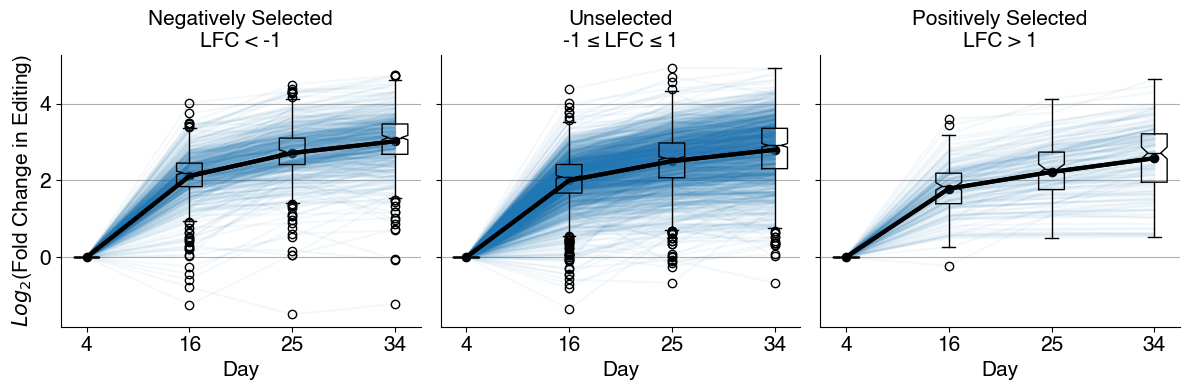

In [62]:
x_ticklabels = [4, 16,25,34]
x = [0,2,4,6]
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)

titles = [f'Negatively Selected\nLFC < {LFC_low}', f'Unselected\n{LFC_low} ≤ LFC ≤ {LFC_high}', f'Positively Selected\nLFC > {LFC_high}']

for i, stacked in enumerate([low_stacked, mid_stacked, high_stacked]):
    normed = [stacked[0]/stacked[0], stacked[1]/stacked[0], stacked[2]/stacked[0], stacked[3]/stacked[0]]
    stacked_norm = np.array(normed).T

    stacked_norm = np.log2(stacked_norm)

    for ii in stacked_norm:
        ax[i].plot(x, ii, color='tab:blue', alpha=0.05)
        #ax[i].scatter(x, ii, color='tab:blue', alpha=0.05)

    normed = [np.log2(i) for i in normed]

    medianprops = dict(color='black')
    ax[i].boxplot(normed, positions=x, notch=True, medianprops=medianprops);

    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)
    ax[i].scatter(x, np.average(stacked_norm, axis=0), color='black')

    y1 = np.average(stacked_norm, axis=0) - np.std(stacked_norm, axis=0)
    y2 = np.average(stacked_norm, axis=0) + np.std(stacked_norm, axis=0)
    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)

    #ax[i].fill_between(x, y1, y2, alpha=.5, color='black')

    #ax[i].fill_between(x, y1, y2, alpha=.5, color='black')

    ax[i].set_xticks(x);
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[0].set_ylabel('$Log_{2}$(Fold Change in Editing)', fontsize=15)
    ax[i].set_xlabel('Day', fontsize=15)
    ax[i].set_title(titles[i], fontsize=15)
    ax[i].grid(axis='y')
    ax[i].set_xticklabels(x_ticklabels)


fig.tight_layout()

## Extended Data Figure 7b
b, Same as (a), but with fold change in editing normalized to Day 16. 

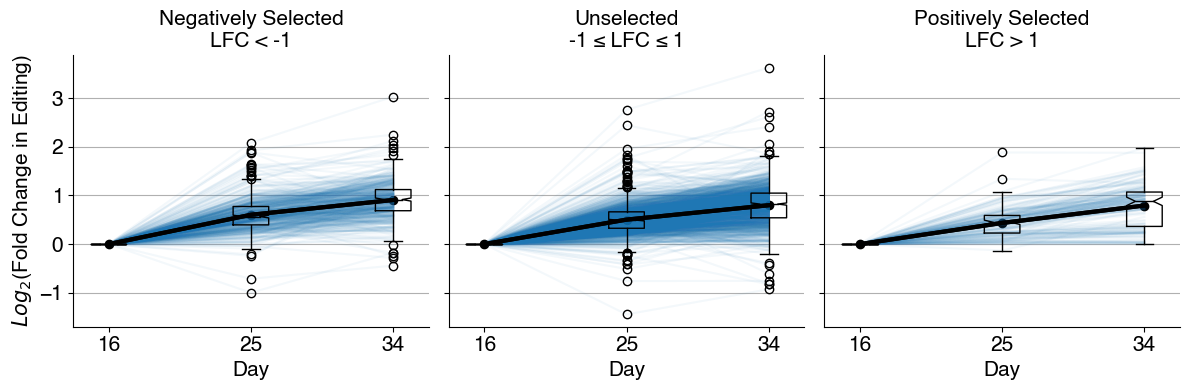

In [63]:
x = [0,2,4]
x_ticklabels = [16,25,34]
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)

titles = [f'Negatively Selected\nLFC < {LFC_low}', f'Unselected\n{LFC_low} ≤ LFC ≤ {LFC_high}', f'Positively Selected\nLFC > {LFC_high}']

for i, stacked in enumerate([low_stacked, mid_stacked, high_stacked]):
    normed = [stacked[1]/stacked[1], stacked[2]/stacked[1], stacked[3]/stacked[1]]
    stacked_norm = np.array(normed).T

    stacked_norm = np.log2(stacked_norm)

    for ii in stacked_norm:
        ax[i].plot(x, ii, color='tab:blue', alpha=0.05)
        #ax[i].scatter(x, ii, color='tab:blue', alpha=0.1)

    normed = [np.log2(i) for i in normed]
    medianprops = dict(color='black')
    ax[i].boxplot(normed, positions=x, notch=True, medianprops=medianprops);

    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)
    ax[i].scatter(x, np.average(stacked_norm, axis=0), color='black')

    y1 = np.average(stacked_norm, axis=0) - np.std(stacked_norm, axis=0)
    y2 = np.average(stacked_norm, axis=0) + np.std(stacked_norm, axis=0)
    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)

    #ax[i].fill_between(x, y1, y2, alpha=.5, color='tab:blue')

    ax[i].set_xticks(x);
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[0].set_ylabel('$Log_{2}$(Fold Change in Editing)', fontsize=15)
    ax[i].set_xlabel('Day', fontsize=15)
    ax[i].set_title(titles[i], fontsize=15)
    ax[i].grid(axis='y')
    ax[i].set_xticklabels(x_ticklabels)


fig.tight_layout()

## Extended Data Figure 7c
c, Same as (a), but for the Nutlin-treated condition.

In [64]:
#Need to do the same for nutlin-treated
LFC_low = -1
LFC_high = 1

mid_nut = nutlin_merge_df[(nutlin_merge_df['LFC_D34-NUT']<=LFC_high) & (nutlin_merge_df['LFC_D34-NUT']>=LFC_low)]
high_nut = nutlin_merge_df[(nutlin_merge_df['LFC_D34-NUT']>LFC_high)]
low_nut = nutlin_merge_df[(nutlin_merge_df['LFC_D34-NUT']<LFC_low)]

untreated = ['D4', 'D16', 'D25', 'D34']
nutlin = ['D4', 'D16-NUT', 'D25-NUT', 'D34-NUT']


low = [np.array(low_nut[f'corr_perc_{i}']) for i in nutlin]
mid = [np.array(mid_nut[f'corr_perc_{i}']) for i in nutlin]
high = [np.array(high_nut[f'corr_perc_{i}']) for i in nutlin]
low_stacked = np.vstack((low[0], low[1], low[2], low[3]))
mid_stacked = np.vstack((mid[0], mid[1], mid[2], mid[3]))
high_stacked = np.vstack((high[0], high[1], high[2], high[3]))

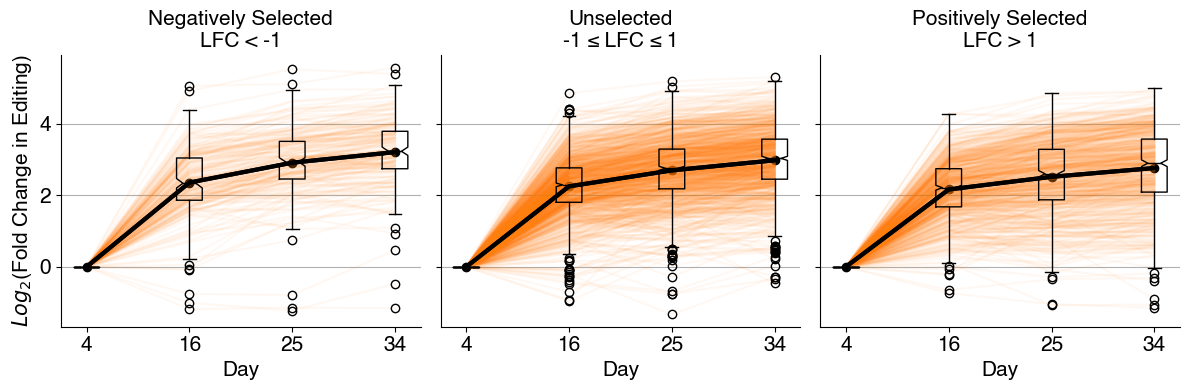

In [65]:
x_ticklabels = [4, 16,25,34]
x = [0,2,4,6]
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)

titles = [f'Negatively Selected\nLFC < {LFC_low}', f'Unselected\n{LFC_low} ≤ LFC ≤ {LFC_high}', f'Positively Selected\nLFC > {LFC_high}']

for i, stacked in enumerate([low_stacked, mid_stacked, high_stacked]):
    normed = [stacked[0]/stacked[0], stacked[1]/stacked[0], stacked[2]/stacked[0], stacked[3]/stacked[0]]
    stacked_norm = np.array(normed).T

    stacked_norm = np.log2(stacked_norm)

    for ii in stacked_norm:
        ax[i].plot(x, ii, color='tab:orange', alpha=0.05)
        #ax[i].scatter(x, ii, color='tab:blue', alpha=0.05)

    normed = [np.log2(i) for i in normed]

    medianprops = dict(color='black')
    ax[i].boxplot(normed, positions=x, notch=True, medianprops=medianprops);

    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)
    ax[i].scatter(x, np.average(stacked_norm, axis=0), color='black')

    y1 = np.average(stacked_norm, axis=0) - np.std(stacked_norm, axis=0)
    y2 = np.average(stacked_norm, axis=0) + np.std(stacked_norm, axis=0)
    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)

    #ax[i].fill_between(x, y1, y2, alpha=.5, color='black')

    #ax[i].fill_between(x, y1, y2, alpha=.5, color='black')

    ax[i].set_xticks(x);
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[0].set_ylabel('$Log_{2}$(Fold Change in Editing)', fontsize=15)
    ax[i].set_xlabel('Day', fontsize=15)
    ax[i].set_title(titles[i], fontsize=15)
    ax[i].grid(axis='y')
    ax[i].set_xticklabels(x_ticklabels)


fig.tight_layout()

## Extended Data Figure 7d
d, Same as (b), but for the Nutlin-treated condition.

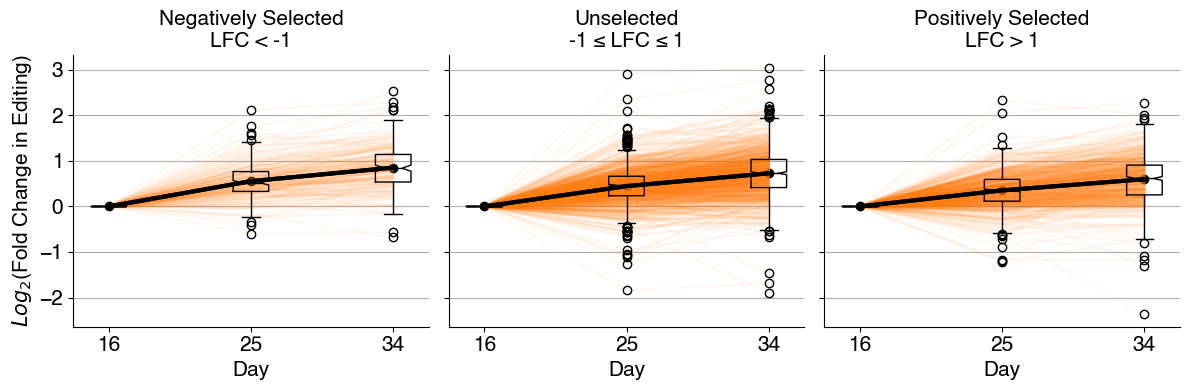

In [66]:
x = [0,2,4]
x_ticklabels = [16,25,34]
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)

titles = [f'Negatively Selected\nLFC < {LFC_low}', f'Unselected\n{LFC_low} ≤ LFC ≤ {LFC_high}', f'Positively Selected\nLFC > {LFC_high}']

for i, stacked in enumerate([low_stacked, mid_stacked, high_stacked]):
    normed = [stacked[1]/stacked[1], stacked[2]/stacked[1], stacked[3]/stacked[1]]
    stacked_norm = np.array(normed).T

    stacked_norm = np.log2(stacked_norm)

    for ii in stacked_norm:
        ax[i].plot(x, ii, color='tab:orange', alpha=0.05)
        #ax[i].scatter(x, ii, color='tab:blue', alpha=0.1)

    normed = [np.log2(i) for i in normed]
    medianprops = dict(color='black')
    ax[i].boxplot(normed, positions=x, notch=True, medianprops=medianprops);

    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)
    ax[i].scatter(x, np.average(stacked_norm, axis=0), color='black')

    y1 = np.average(stacked_norm, axis=0) - np.std(stacked_norm, axis=0)
    y2 = np.average(stacked_norm, axis=0) + np.std(stacked_norm, axis=0)
    ax[i].plot(x, np.average(stacked_norm, axis=0), color='black', alpha=1, linewidth=3)

    #ax[i].fill_between(x, y1, y2, alpha=.5, color='tab:blue')

    ax[i].set_xticks(x);
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[0].set_ylabel('$Log_{2}$(Fold Change in Editing)', fontsize=15)
    ax[i].set_xlabel('Day', fontsize=15)
    ax[i].set_title(titles[i], fontsize=15)
    ax[i].grid(axis='y')
    ax[i].set_xticklabels(x_ticklabels)


fig.tight_layout()

# Extended Data Figure 8 – Analysis of TP53 hotspot variant editing & fitness. 

## Extended Data Figure 8a
a, Scatterplot of pegRNA sensor correct editing percentage and LFC at Day 34 in the untreated arm of the screen. Top 20 hotspot variant pegRNAs colored in red. Linear regression line displayed. 

In [170]:
vars_only = p53_filtered.drop_duplicates(subset='HGVSp')
top20 = vars_only.sort_values(by='num_occurences', ascending=False)[0:20]

hotspot_pegs = []
for i in top20['HGVSp']:
    p = list(p53_filtered[p53_filtered['HGVSp']==i]['peg_id'])
    for ii in p:
        hotspot_pegs.append(ii)

In [171]:
#start with D4
d4 = cp_dict2['D4'][['peg_id', 'Reads_aligned_all_amplicons', 'corr_perc_backsub']]
d4 = d4.rename(columns = {'Reads_aligned_all_amplicons':f'counts_D4', 'corr_perc_backsub':f'corr_perc_D4'})


#untreated samples
untreated = ['D16', 'D25', 'D34']
nutlin = ['D16-NUT', 'D25-NUT', 'D34-NUT']

untreated_merged = []
for sample in untreated:
    a = mageck_dict[sample]
    b = cp_dict2[sample]

    merge1 = pd.merge(a[['peg_id', "LFC"]], b[['peg_id', 'Reads_aligned_all_amplicons', 'corr_perc_backsub']], on='peg_id', how='left')
    merge1 = merge1.rename(columns = {'LFC':f'LFC_{sample}', 'Reads_aligned_all_amplicons':f'counts_{sample}', 'corr_perc_backsub':f'corr_perc_{sample}'})
    untreated_merged.append(merge1)

#nutlin samples
nutlin_merged = []
for sample in nutlin:
    a = mageck_dict[sample]
    b = cp_dict2[sample]

    merge1 = pd.merge(a[['peg_id', "LFC"]], b[['peg_id', 'Reads_aligned_all_amplicons', 'corr_perc_backsub']], on='peg_id', how='left')
    merge1 = merge1.rename(columns = {'LFC':f'LFC_{sample}', 'Reads_aligned_all_amplicons':f'counts_{sample}', 'corr_perc_backsub':f'corr_perc_{sample}'})
    nutlin_merged.append(merge1)

#untreated samples
m1 = pd.merge(d4, untreated_merged[0], on='peg_id', how='left')
m2 = pd.merge(m1, untreated_merged[1], on='peg_id', how='left')
untreated_merge_df = pd.merge(m2, untreated_merged[2], on='peg_id', how='left')

#nutlin samples
n1 = pd.merge(d4, nutlin_merged[0], on='peg_id', how='left')
n2 = pd.merge(n1, nutlin_merged[1], on='peg_id', how='left')
nutlin_merge_df = pd.merge(n2, nutlin_merged[2], on='peg_id', how='left')

#----------FILTRATION---------------
#now applying the counts and minimum editing filtration...
counts_threshold = 50
min_edit = 0 #minimum 1% editing at all timepoints

#counts thresholding
untreated_merge_df = untreated_merge_df[(untreated_merge_df['counts_D34']>=counts_threshold)]
nutlin_merge_df = nutlin_merge_df[(nutlin_merge_df['counts_D34-NUT']>=counts_threshold)]

#filtering for only active pegRNAs...
untreated_merge_df = untreated_merge_df[(untreated_merge_df['corr_perc_D34']>=min_edit)]
nutlin_merge_df = nutlin_merge_df[(nutlin_merge_df['corr_perc_D34-NUT']>=min_edit)]

#------ANNOTATION------
#annotate the hotspots (based on the above list)

untreated_merge_df.loc[untreated_merge_df['peg_id'].isin(hotspot_pegs), 'hotspot']=True
untreated_merge_df.loc[~untreated_merge_df['peg_id'].isin(hotspot_pegs), 'hotspot']=False
nutlin_merge_df.loc[nutlin_merge_df['peg_id'].isin(hotspot_pegs), 'hotspot']=True
nutlin_merge_df.loc[~nutlin_merge_df['peg_id'].isin(hotspot_pegs), 'hotspot']=False
nutlin_merge_df

peg_id  counts_D4  corr_perc_D4  LFC_D16-NUT  counts_D16-NUT  \
2          peg_2       3188      0.885668     -1.22730          1786.0   
3          peg_3       6253      0.801269     -0.23616          3690.0   
4          peg_4       4301      0.720763     -0.87591          1945.0   
5          peg_5       9971      0.792298     -1.34900          4457.0   
6          peg_6       4846      0.241205     -1.07040          1900.0   
...          ...        ...           ...          ...             ...   
28214  peg_28669       2966      0.000000      0.97691          5660.0   
28215  peg_28670        154      0.000000     -0.63935           428.0   
28216  peg_28671        875      0.000000      1.70560          1918.0   
28217  peg_28672        759      0.099473      1.38790          1888.0   
28218  peg_28673        718      0.000000      0.58796          1284.0   

       corr_perc_D16-NUT  LFC_D25-NUT  counts_D25-NUT  corr_perc_D25-NUT  \
2              11.409314    -0.051958          1960.0          14.308964   
3               7.049063     1.446100          2970.0          11.066473   
4               0.359897     0.028506          1903.0           0.472937   
5              11.330491    -0.227230          5254.0          14.921964   
6               9.473518    -0.107860          1967.0          11.783688   
...                  ...          ...             ...                ...   
28214           0.053004     0.588620          2546.0           0.078555   
28215           0.000000    -1.045200           178.0           0.000000   
28216           0.334147     1.177900           725.0           0.107114   
28217           0.000000     0.803540           633.0           0.000000   
28218           0.000000     0.354880           443.0           0.000000   

       LFC_D34-NUT  counts_D34-NUT  corr_perc_D34-NUT hotspot  
2         -1.08790          1455.0          18.307141    True  
3          0.10645          2203.0          13.357915    True  
4         -1.50950           810.0           1.234568    True  
5         -1.39250          3927.0          19.455055    True  
6         -1.75830          1013.0          18.144064    True  
...            ...             ...                ...     ...  
28214      1.23980          6068.0           0.098879   False  
28215      0.53286          1547.0           0.000000   False  
28216      1.76490          2689.0           0.080749   False  
28217      1.91780          2307.0           0.000000   False  
28218      1.26310          1897.0           0.073572   False  

[15298 rows x 13 columns]

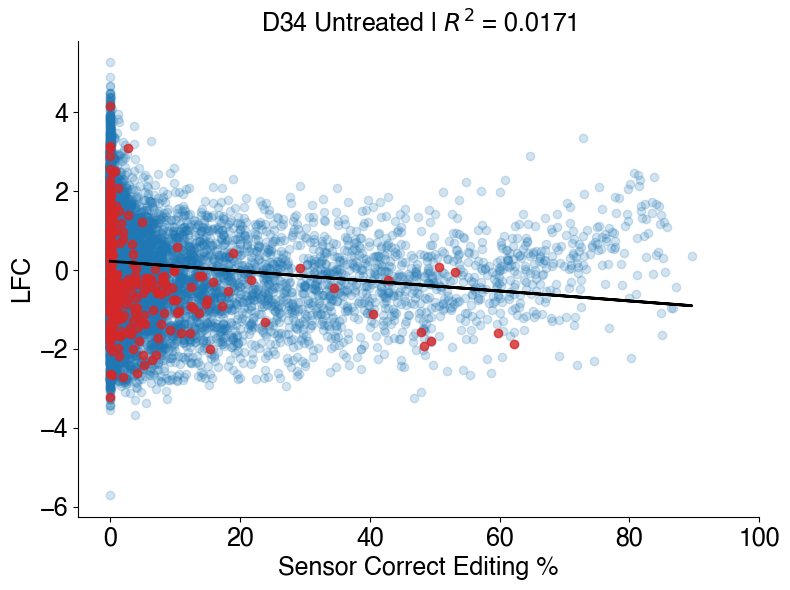

In [172]:
from sklearn.linear_model import LinearRegression

nonhot = untreated_merge_df[untreated_merge_df['hotspot']==False]
hot = untreated_merge_df[untreated_merge_df['hotspot']==True]

x = np.array(untreated_merge_df['corr_perc_D34'])
y = np.array(untreated_merge_df['LFC_D34'])

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(nonhot['corr_perc_D34'], nonhot['LFC_D34'], alpha=.2, color='tab:blue', label='non-hotspot')
ax.scatter(hot['corr_perc_D34'], hot['LFC_D34'], alpha=.8, color='tab:red', label='hotspot')


x2 = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x2, y)
y_pred = model.predict(x2)
ax.plot(x2, y_pred, color='black', linewidth=2)


pear = np.round(scipy.stats.pearsonr(x,y).statistic, 3)
spear = np.round(scipy.stats.spearmanr(x,y).statistic,3)
rsq = np.round(scipy.stats.pearsonr(x,y).statistic**2, 4)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_title(f'D34 Untreated | R = {pear} | r = {spear}', fontsize=15)
ax.set_title(f'D34 Untreated | $R^{2}$ = {rsq}', fontsize=18)
ax.set_ylabel('LFC', fontsize=18)
ax.set_xlabel('Sensor Correct Editing %', fontsize=18)
ax.set_xlim(-5, 100)

fig.tight_layout()

## Extended Data Figure 8b
b, Same as (a), but for the Nutlin-treated condition.

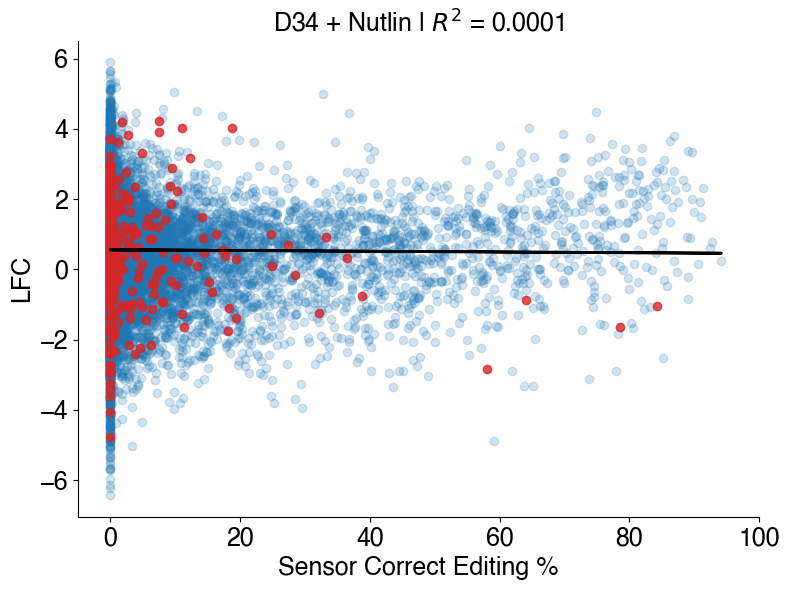

In [173]:
nonhot = nutlin_merge_df[nutlin_merge_df['hotspot']==False]
hot = nutlin_merge_df[nutlin_merge_df['hotspot']==True]

x = np.array(nutlin_merge_df['corr_perc_D34-NUT'])
y = np.array(nutlin_merge_df['LFC_D34-NUT'])

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(nonhot['corr_perc_D34-NUT'], nonhot['LFC_D34-NUT'], alpha=.2, color='tab:blue', label='non-hotspot')
ax.scatter(hot['corr_perc_D34-NUT'], hot['LFC_D34-NUT'], alpha=.8, color='tab:red', label='hotspot')


x2 = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x2, y)
y_pred = model.predict(x2)
ax.plot(x2, y_pred, color='black', linewidth=2)


pear = np.round(scipy.stats.pearsonr(x,y).statistic, 3)
spear = np.round(scipy.stats.spearmanr(x,y).statistic,3)
rsq = np.round(scipy.stats.pearsonr(x,y).statistic**2, 4)


ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_title(f'D34 + Nutlin | R = {pear} | r = {spear}', fontsize=15)
ax.set_title(f'D34 + Nutlin | $R^{2}$ = {rsq}', fontsize=18)
ax.set_ylabel('LFC', fontsize=18)
ax.set_xlabel('Sensor Correct Editing %', fontsize=18)

ax.set_xlim(-5, 100)
fig.tight_layout()

## Extended Data Figure 8c
c, Sensor correct editing percentage for the top 20 most frequently observed hotspot variants, with pegRNAs with a LFC ≥ 2 highlighted in orange, and observed occurrences in MSK-IMPACT dataset shown in right panel. 

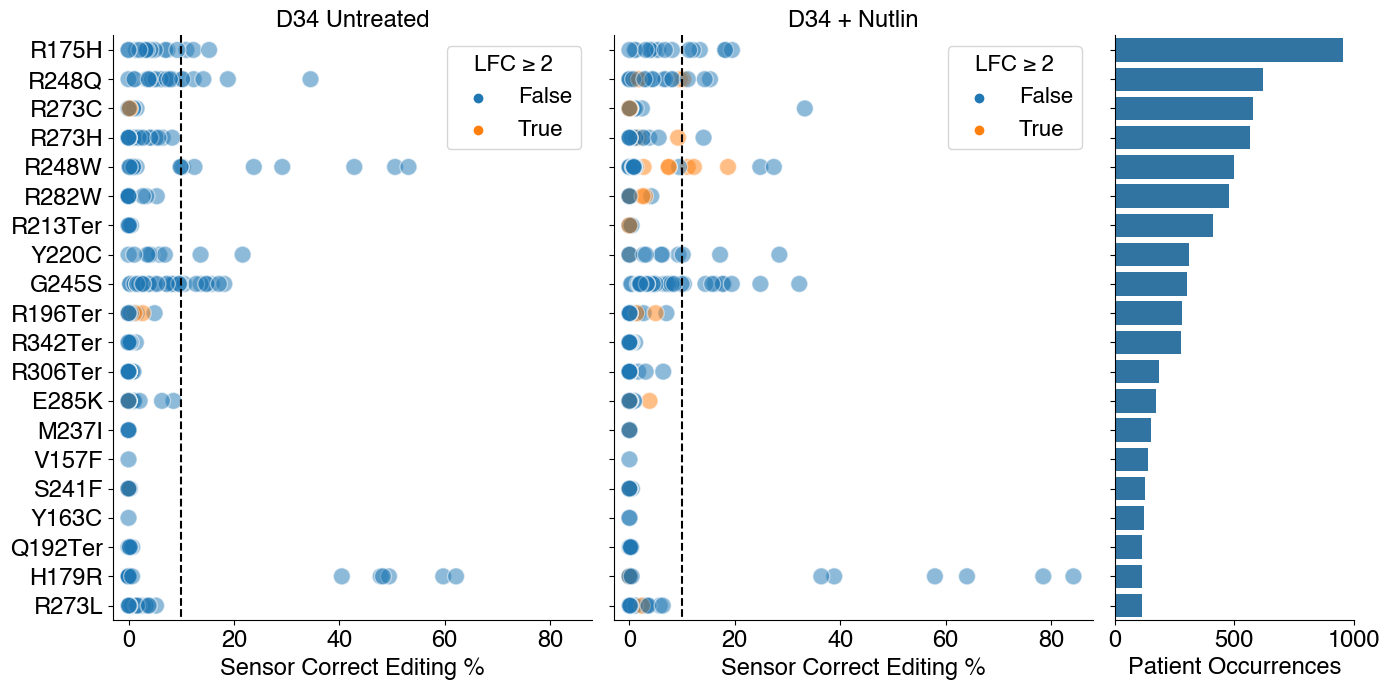

In [75]:
hot_untreat = untreated_merge_df[untreated_merge_df['hotspot']==True]
hot_nutlin = nutlin_merge_df[nutlin_merge_df['hotspot']==True]

hot_nutlin = pd.merge(hot_nutlin, p53_filtered, on='peg_id', how='left')
hot_untreat = pd.merge(hot_untreat, p53_filtered, on='peg_id', how='left')

LFC_cutoff = 2
hot_nutlin.loc[hot_nutlin['LFC_D34-NUT']>=LFC_cutoff, f'LFC ≥ {LFC_cutoff}']=True
hot_nutlin.loc[~(hot_nutlin['LFC_D34-NUT']>=LFC_cutoff), f'LFC ≥ {LFC_cutoff}']=False
hot_untreat.loc[hot_untreat['LFC_D34']>=LFC_cutoff, f'LFC ≥ {LFC_cutoff}']=True
hot_untreat.loc[~(hot_untreat['LFC_D34']>=LFC_cutoff), f'LFC ≥ {LFC_cutoff}']=False

fig, ax = plt.subplots(1, 3, figsize=(14,7), sharey=True, sharex=False, width_ratios=[1,1,.5])
sns.scatterplot(data=hot_untreat, x='corr_perc_D34', y='HGVSp', alpha=.5, s=150, hue=f'LFC ≥ {LFC_cutoff}', ax=ax[0])
sns.scatterplot(data=hot_nutlin, x='corr_perc_D34-NUT', y='HGVSp', alpha=.5, s=150, hue=f'LFC ≥ {LFC_cutoff}', ax=ax[1])


ax[0].spines[['right', 'top']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=17)
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=17)
ax[0].plot([10,10],[-.5,19.5], linestyle='dashed', color='black')
ax[1].plot([10,10],[-.5,19.5], linestyle='dashed', color='black')
ax[0].set_ylim(19.5, -.5)
ax[1].set_ylim(19.5, -.5)

ax[0].legend(title = 'LFC ≥ 2', title_fontsize='16',fontsize=16)
ax[1].legend(title = 'LFC ≥ 2', title_fontsize='16',fontsize=16)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[1].set_xlabel('Sensor Correct Editing %', fontsize=17)
ax[0].set_xlabel('Sensor Correct Editing %', fontsize=17)
ax[0].set_title('D34 Untreated', fontsize=17)
ax[1].set_title('D34 + Nutlin', fontsize=17)
ax[0].set_xlim(-3,88)
ax[1].set_xlim(-3,88)

sns.barplot(data=hot_nutlin, x='num_occurences', y='HGVSp', ax=ax[2], color='tab:blue')
ax[2].spines[['right', 'top']].set_visible(False)
ax[2].tick_params(axis='both', which='major', labelsize=17)
ax[2].set_ylabel('')
ax[2].set_xlabel('Patient Occurrences', fontsize=17)
fig.tight_layout()

## Extended Data Figure 8d
c, Sensor correct editing percentage at Day 34 in the Nutlin-treated condition for the R248 mutants, with pegRNAs with a LFC ≥ 2 highlighted in orange. 

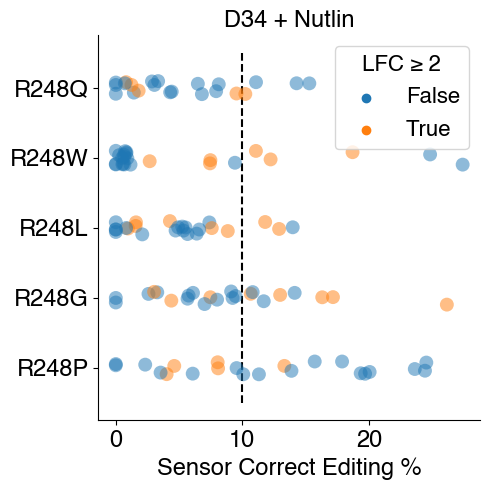

In [178]:
#looking at codon 248

corr_perc_min = 0
nutlin_merge_df2 = nutlin_merge_df[nutlin_merge_df['corr_perc_D34-NUT']>=corr_perc_min]


ndf = pd.merge(nutlin_merge_df2, p53_filtered, on='peg_id', how='left')

r248x = ndf[ndf['codon']==248]

LFC_cutoff = 2
r248x.loc[r248x['LFC_D34-NUT']>=LFC_cutoff, f'LFC ≥ {LFC_cutoff}']=True
r248x.loc[~(r248x['LFC_D34-NUT']>=LFC_cutoff), f'LFC ≥ {LFC_cutoff}']=False

aaaa = ['R248W', 'R248Q']
r248x.loc[(r248x['HGVSp'].isin(aaaa)), 'hotspot']=True
r248x.loc[~(r248x['HGVSp'].isin(aaaa)), 'hotspot']=False


fig, ax = plt.subplots(figsize=(5,5))
sns.stripplot(data = r248x, x='corr_perc_D34-NUT', y='HGVSp', alpha=.5, s=10, hue=f'LFC ≥ {LFC_cutoff}', ax=ax, legend=True)
ax.plot([10,10], [0-.5,4+.5], color='black', linestyle='dashed')

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_ylabel('')
ax.set_xlabel('Sensor Correct Editing %', fontsize=17)
ax.set_title('D34 + Nutlin', fontsize=17)
ax.legend(title = 'LFC ≥ 2', title_fontsize='16',fontsize=16)

fig.tight_layout()


## Extended Data Figure 8e
c, Scatterplot of sensor correct editing percentage at Day 34 in the Nutlin-treated condition for the R248 mutants, plotted against the LFC at the same time-point and condition. Hotspot variants (R248Q and R248W) highlighted in red.  

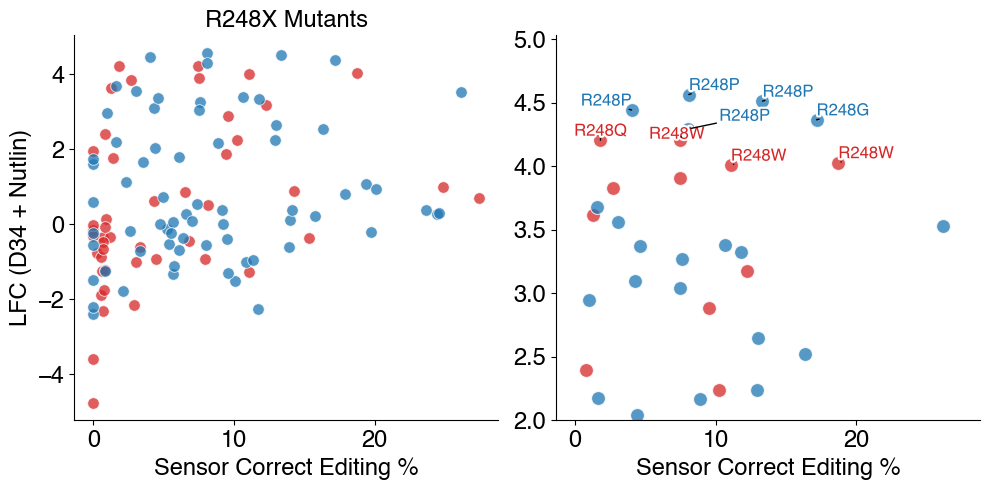

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True)
sns.scatterplot(data=r248x[r248x['hotspot']==True], x='corr_perc_D34-NUT', y='LFC_D34-NUT', s=70,  c = 'tab:red', ax=ax[0], alpha=.75)
sns.scatterplot(data=r248x[r248x['hotspot']==False], x='corr_perc_D34-NUT', y='LFC_D34-NUT', s=70,  c = 'tab:blue', ax=ax[0], alpha=.75)
sns.scatterplot(data=r248x[r248x['hotspot']==True], x='corr_perc_D34-NUT', y='LFC_D34-NUT', s=100,  c = 'tab:red', ax=ax[1], alpha=.75)
sns.scatterplot(data=r248x[r248x['hotspot']==False], x='corr_perc_D34-NUT', y='LFC_D34-NUT', s=100,  c = 'tab:blue', ax=ax[1], alpha=.75)

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)

ax[0].tick_params(axis='both', which='major', labelsize=17)
ax[1].tick_params(axis='both', which='major', labelsize=17)
ax[1].set_ylim(2,)
ax[0].set_ylabel('LFC (D34 + Nutlin)', fontsize=17)
ax[1].set_ylabel('')

ax[0].set_xlabel('Sensor Correct Editing %', fontsize=17)
ax[1].set_xlabel('Sensor Correct Editing %', fontsize=17)

ax[0].set_title('R248X Mutants', fontsize=17)
r248x_2 = r248x[r248x['LFC_D34-NUT']>=4]

color = []
for i, val in r248x_2.iterrows():
    k =  val['hotspot']
    if k==True:
        color.append('tab:red')
    else:
      color.append('tab:blue')

r248x_2['color'] = color

t = list(r248x_2['HGVSp'])
x=list(r248x_2['corr_perc_D34-NUT'])
y = list(r248x_2['LFC_D34-NUT'])
c = list(r248x_2['color'])
#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

#c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

texts = [ax[1].text(x[i], y[i], t[i], c = c[i], fontsize=12, color='black', path_effects=[PathEffects.withStroke(linewidth=3,
                                                                                  foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)


adjust_text(texts,only_move={'points':'y', 'texts':'xy'}, ax=ax[1], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))

fig.tight_layout()

# Extended Data Figure 9 – Competition assays functionally validate the pathogenicity of TP53 variants identified with prime editing screens.

## Extended Data Figure 9a
a, Detailed information on pegRNAs selected for follow-up evaluation with competition assays. Cells marked with “X” indicate insufficient sensor reads (<10) to determine editing percentage, or insufficient Day 4 control pegRNA counts (<10) to determine LFC. 

In [78]:
p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')

p_ids = ['peg_16602', 'peg_465', 'peg_2','peg_218', 'peg_31', 'peg_311', 'peg_178', 'peg_885', 'peg_683', 'peg_14531', 'peg_8247', 'peg_12022', 'peg_7449', 'peg_21875', 'peg_12868', 'peg_18555', 'peg_25828', 'peg_22204', 'peg_138', 'peg_6764', 'peg_4583', 'peg_1864', 'peg_9611', 'peg_27888', 'peg_26951','peg_26576', 'peg_21343', 'peg_4127', 'peg_55']
comp = p53_filtered[p53_filtered['peg_id'].isin(p_ids)].reset_index().drop(columns='index')

#load in competition assay pegRNAs and information

In [79]:
#loading in the merged replicates and merging with the competition assay
fp = "crispresso_replicates_merged"
reorder = []
conditions = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']
for i in conditions:
    df = pd.read_csv(f"{fp}/{i}_reps_combined.csv")
    df['peg_id'] = p53_filtered['peg_id']
    reorder.append(df)

cp_dict2 = dict(zip(conditions, reorder))
samps = list(cp_dict2.keys())[1:]

#reading in mageck to extract LFC
fp = './MAGeCK analysis'
files = os.listdir(fp)
files = sorted([f for f in files if f[-3:]=='txt'])

dfs = []
for i,f in enumerate(files):
    df = pd.read_csv(fp + '/' + f, sep='\t')

    #ensure naming is correct
    assert f[:3]==samps[i][:3]

    #reorder the pegs...
    df = df.rename(columns = {'sgrna':'peg_id'})
    df_merge = pd.merge(p53_filtered, df, how='left', on='peg_id')

    #also add in merge of cp_dict?
    dfs.append(df_merge)


#perform thresholding of control_mean counts (filtering out pegRNAs with below 10 control counts mean)
#differences in counts because of normalization
#going to do it for one and apply it to all...

control_mean_threshold = 10

#d16
dd = dfs[0]
dd = dd[dd['control_mean']>=control_mean_threshold]
pegs_above_thres = dd['peg_id']

dfs2 = []
for i in dfs:
    dfs2.append(i[i['peg_id'].isin(pegs_above_thres)])

assert list(dfs2[0]['peg_id']) == list(dfs2[1]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[2]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[3]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[4]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[5]['peg_id']) 

mageck_dict = dict(zip(samps, dfs2))

In [80]:
#extracting information and merging with competition assay dataframe
d34_cp = []
d34_nut_cp = []
d34_lfc = []
d34_nut_lfc = []

counts_threshold = 10

cp_untreated = []
cp_nutlin = []

for i in comp['peg_id']:
    #editing efficiency quantification
    d34 = cp_dict2['D34']
    d34 = d34[d34['Reads_aligned_all_amplicons'] >= counts_threshold]

    d34_nut = cp_dict2['D34-NUT']
    d34_nut = d34_nut[d34_nut['Reads_aligned_all_amplicons'] >= counts_threshold]

    d34 = d34[d34['peg_id']==i]
    d34_nut = d34_nut[d34_nut['peg_id']==i]

    if len(d34)>0: #if sufficient sensor counts
        d34_cp.append(d34['corr_perc_backsub'].values[0])
        cp_untreated.append(False)
    else:
        cp_untreated.append(True)
        d34_cp.append(0)

    if len(d34_nut)>0: #if sufficient sensor counts
        d34_nut_cp.append(d34_nut['corr_perc_backsub'].values[0])
        cp_nutlin.append(False)
    else:
        cp_nutlin.append(True)
        d34_nut_cp.append(0)

    #LFC quantification
    d34_m = mageck_dict['D34']
    d34_nut_m = mageck_dict['D34-NUT']

    d34_m = d34_m[d34_m['peg_id']==i]
    d34_nut_m = d34_nut_m[d34_nut_m['peg_id']==i]

    if len(d34_m)>0: #if sufficient sensor counts
        d34_lfc.append(d34_m['LFC'].values[0])
    else:
        d34_lfc.append(0)

    if len(d34_nut_m)>0: #if sufficient sensor counts
        d34_nut_lfc.append(d34_nut_m['LFC'].values[0])
    else:
        d34_nut_lfc.append(0)


comp['Corr_perc_untreated'] = d34_cp
comp['Corr_perc_nutlin'] = d34_nut_cp
comp['LFC_untreated'] = d34_lfc
comp['LFC_nutlin'] = d34_nut_lfc

#add info about where thresholds have been applied
comp['insufficient_LFC_counts'] = list(comp['LFC_nutlin']==0)
comp['insufficient_sensor_counts_untreated'] = cp_untreated
comp['insufficient_sensor_counts_nutlin'] = cp_nutlin

#and adding in some other info
mut = []
for idx, val in comp.iterrows():
    aa = val['HGVSp']
    type1 = val['variant_type']
    conseq = val['consequence']
    if conseq in ['Silent']:
        mut.append(conseq)
    else:
        mut.append(type1)


comp['Effect'] = mut

In [81]:
high1 = comp[comp['Corr_perc_nutlin']>=30].index
low1 = comp[comp['Corr_perc_nutlin']<=9.4].index
med1 = comp[(comp['Corr_perc_nutlin']>9.4) & (comp['Corr_perc_nutlin']<30)].index

comp['efficiency'] = np.zeros(len(comp))
comp.loc[high1, 'efficiency'] = 'high'
comp.loc[med1, 'efficiency'] = 'medium'
comp.loc[low1, 'efficiency'] = 'low'

low = comp[comp['efficiency']=='low'].reset_index().sort_values(by='Corr_perc_nutlin', ascending=False)
med = comp[comp['efficiency']=='medium'].reset_index().sort_values(by='Corr_perc_nutlin', ascending=False)
high = comp[comp['efficiency']=='high'].reset_index().sort_values(by='Corr_perc_nutlin', ascending=False)

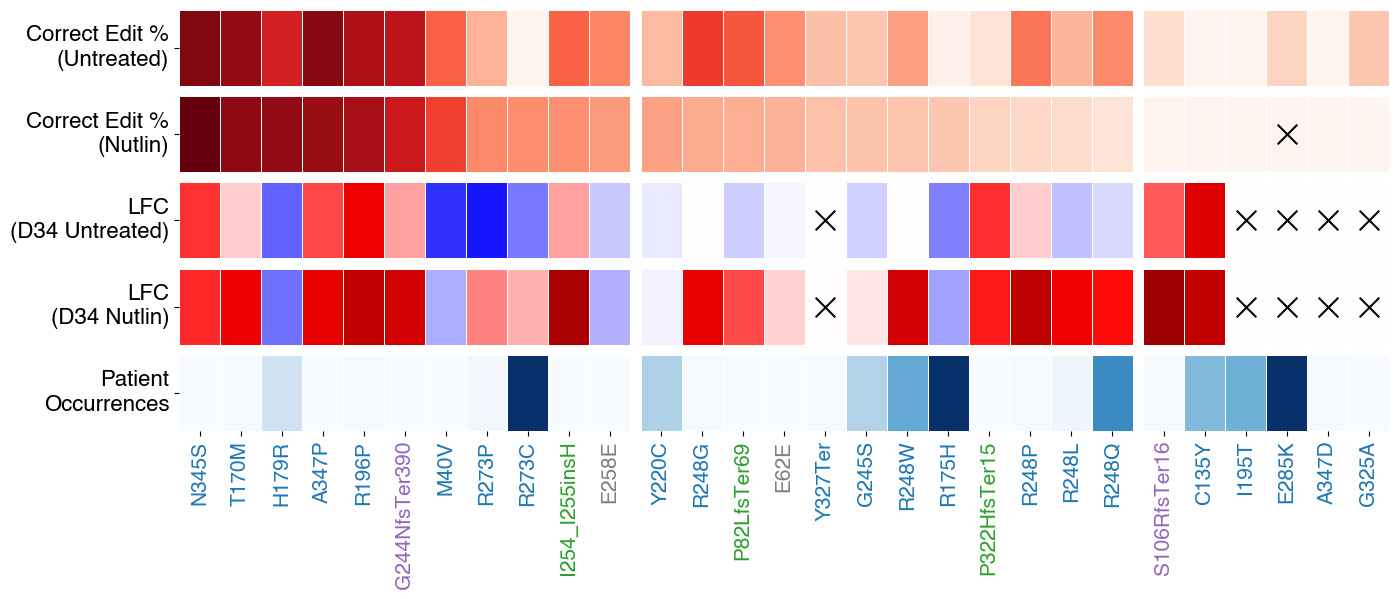

In [83]:
fig, ax = plt.subplots(5,3,figsize=(14,6), sharey=False, sharex=False, width_ratios=[11, 12, 6])
#high, medium, low

g = sns.heatmap([high['Corr_perc_untreated']], ax= ax[0][0], linewidth=.5, cmap='Reds', vmin=0, vmax=86, cbar=False)
g = sns.heatmap([high['Corr_perc_nutlin']], ax= ax[1][0], linewidth=.5,cmap='Reds', vmin=0, vmax=86, cbar=False)
g = sns.heatmap([high['LFC_untreated']], ax= ax[2][0], linewidth=.5,cmap='seismic', vmin=-6, vmax=6, cbar=False)
g = sns.heatmap([high['LFC_nutlin']], ax= ax[3][0], linewidth=.5,cmap='seismic', vmin=-6, vmax=6, cbar=False)
g1 = sns.heatmap([high['num_occurences']], ax= ax[4][0], linewidth=.5,cmap='Blues', cbar=False)

g = sns.heatmap([med['Corr_perc_untreated']], ax= ax[0][1], linewidth=.5, cmap='Reds', vmin=0, vmax=86, cbar=False)
g = sns.heatmap([med['Corr_perc_nutlin']], ax= ax[1][1], linewidth=.5, cmap='Reds', vmin=0, vmax=86, cbar=False)
g = sns.heatmap([med['LFC_untreated']], ax= ax[2][1], linewidth=.5, cmap='seismic', vmin=-6, vmax=6, cbar=False)
g = sns.heatmap([med['LFC_nutlin']], ax= ax[3][1], linewidth=.5, cmap='seismic', vmin=-6, vmax=6, cbar=False)
g2 = sns.heatmap([med['num_occurences']], ax= ax[4][1], linewidth=.5, cmap='Blues', cbar=False)

g = sns.heatmap([low['Corr_perc_untreated']], ax= ax[0][2], linewidth=.5,cmap='Reds', vmin=0, vmax=86, cbar=False)
g = sns.heatmap([low['Corr_perc_nutlin']], ax= ax[1][2], linewidth=.5,cmap='Reds', vmin=0, vmax=86, cbar=False)
g = sns.heatmap([low['LFC_untreated']], ax= ax[2][2], linewidth=.5, cmap='seismic', vmin=-6, vmax=6, cbar=False)
g = sns.heatmap([low['LFC_nutlin']], ax= ax[3][2], linewidth=.5, cmap='seismic', vmin=-6, vmax=6, cbar=False)
g3 = sns.heatmap([low['num_occurences']], ax= ax[4][2], linewidth=.5,cmap='Blues', cbar=False)

#and show where there are insufficient read counts for sensor editing measurement
high_untreat = [i for i, val in enumerate(high['insufficient_sensor_counts_untreated']) if val==True]
high_nut = [i for i, val in enumerate(high['insufficient_sensor_counts_nutlin']) if val==True]
med_untreat = [i for i, val in enumerate(med['insufficient_sensor_counts_untreated']) if val==True]
med_nut = [i for i, val in enumerate(med['insufficient_sensor_counts_nutlin']) if val==True]
low_untreat = [i for i, val in enumerate(low['insufficient_sensor_counts_untreated']) if val==True]
low_nut = [i for i, val in enumerate(low['insufficient_sensor_counts_nutlin']) if val==True]

#
ax[0][0].scatter(np.array(high_untreat)+.5, [0.5]*len(high_untreat), marker='x', s=200, color='black')
ax[1][0].scatter(np.array(high_nut)+.5, [0.5]*len(high_nut), marker='x', s=200, color='black')
ax[0][1].scatter(np.array(med_untreat)+.5, [0.5]*len(med_untreat), marker='x', s=200, color='black')
ax[1][1].scatter(np.array(med_nut)+.5, [0.5]*len(med_nut), marker='x', s=200, color='black')
ax[0][2].scatter(np.array(low_untreat)+.5, [0.5]*len(low_untreat), marker='x', s=200, color='black')
ax[1][2].scatter(np.array(low_nut)+.5, [0.5]*len(low_nut), marker='x', s=200, color='black')


high_untreat = [i for i, val in enumerate(high['insufficient_LFC_counts']) if val==True]
med_untreat = [i for i, val in enumerate(med['insufficient_LFC_counts']) if val==True]
low_untreat = [i for i, val in enumerate(low['insufficient_LFC_counts']) if val==True]

#
ax[2][0].scatter(np.array(high_untreat)+.5, [0.5]*len(high_untreat), marker='x', s=200, color='black')
ax[2][1].scatter(np.array(med_untreat)+.5, [0.5]*len(med_untreat), marker='x', s=200, color='black')
ax[2][2].scatter(np.array(low_untreat)+.5, [0.5]*len(low_untreat), marker='x', s=200, color='black')
ax[3][0].scatter(np.array(high_untreat)+.5, [0.5]*len(high_untreat), marker='x', s=200, color='black')
ax[3][1].scatter(np.array(med_untreat)+.5, [0.5]*len(med_untreat), marker='x', s=200, color='black')
ax[3][2].scatter(np.array(low_untreat)+.5, [0.5]*len(low_untreat), marker='x', s=200, color='black')

#ax[0].set_yticklabels(['LFC Untreated'], rotation=0)
#ax[1].set_yticklabels(['LFC Nutlin'], rotation=0)
ax[0][0].set_yticklabels(['Correct Edit %\n(Untreated)'], rotation=0, fontsize=16)
ax[1][0].set_yticklabels(['Correct Edit %\n(Nutlin)'], rotation=0, fontsize=16)
ax[2][0].set_yticklabels(['LFC\n(D34 Untreated)'], rotation=0, fontsize=16)
ax[3][0].set_yticklabels(['LFC\n(D34 Nutlin)'], rotation=0, fontsize=16)
ax[4][0].set_yticklabels(['Patient\nOccurrences'], rotation=0, fontsize=16)

ax[0][1].set_yticks([])
ax[1][1].set_yticks([])
ax[2][1].set_yticks([])
ax[0][2].set_yticks([])
ax[1][2].set_yticks([])
ax[2][2].set_yticks([])
ax[3][1].set_yticks([])
ax[4][1].set_yticks([])
ax[3][2].set_yticks([])
ax[4][2].set_yticks([])
#ax[3][3].set_yticks([])
#ax[4][3].set_yticks([])

ax[0][0].set_xticks([])
ax[1][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][1].set_xticks([])
ax[0][2].set_xticks([])
ax[1][2].set_xticks([])
ax[3][0].set_xticks([])
ax[2][0].set_xticks([])
ax[3][1].set_xticks([])
ax[2][1].set_xticks([])
ax[3][2].set_xticks([])
ax[2][2].set_xticks([])
#ax[4].set_xticklabels(comp['HGVSp'], rotation=90)

ax[4][0].set_xticklabels(high['HGVSp'], rotation=90, fontsize=15)
ax[4][1].set_xticklabels(med['HGVSp'], rotation=90, fontsize=15)
ax[4][2].set_xticklabels(low['HGVSp'], rotation=90, fontsize=15)

c_dict = {'SNV':'tab:blue', 'INS':'tab:green', 'DEL':'tab:purple', 'Silent':'grey'}

for i, tick_label in enumerate(g1.axes.get_xticklabels()):
    cc = c_dict[high.iloc[i]['Effect']]
    tick_label.set_color(cc)

for i, tick_label in enumerate(g2.axes.get_xticklabels()):
    cc = c_dict[med.iloc[i]['Effect']]
    tick_label.set_color(cc)

for i, tick_label in enumerate(g3.axes.get_xticklabels()):
    cc = c_dict[low.iloc[i]['Effect']]
    tick_label.set_color(cc)

fig.tight_layout(pad=.75)


## Extended Data Figure 9b
b, Full competition assay results for assayed pegRNAs. Points marked with “X” indicate a replicate with an insufficient viable cell count (<500) to determine the RFP+ %. In this case, the RFP+ % was quantified as unchanged from the previous time-point for the matched replicate. 

In [84]:
fp1 = 'competition_asay_data_FULL'

#read the plate set up into a dictionary
l1 = os.listdir(fp1)
l1 = sorted([i for i in l1 if i[-3:]=='csv'])

df_holder = []
for i in l1:
    a = pd.read_csv(f'{fp1}/{i}')
    df_holder.append(a)

key_dict = dict(zip(l1, df_holder))

In [91]:
#then read in the compeition assay flow data
#processed with FlowJo

fp2 = 'competition_asay_data_FULL/processed_data'
l2 = os.listdir(fp2)
l2 = sorted([i for i in l2 if i[-3:]=='csv'])

#and match up plate set up with correct files
#make a joint table for matching things up

matching = [None,
'A549-PEmax-p53ODmuts-WellplateSetup-plate1.csv',
'A549-PEmax-p53ODmuts-WellplateSetup-plate2.csv',
'A549-PEmax-p53ODmuts-WellplateSetup-plate1.csv',
 'A549-PEmax-p53ODmuts-WellplateSetup-plate2.csv',
 'A549-PEmax-p53ODmuts-WellplateSetup-plate1.csv',
 'A549-PEmax-p53ODmuts-WellplateSetup-plate2.csv',
 None,
 'A549-PEmax-pegRNAvalidation-REDO-WellplateSetup-plate1.csv',
 'A549-PEmax-pegRNAvalidation-REDO-WellplateSetup-plate2.csv',
 'A549-PEmax-pegRNAvalidation-REDO-WellplateSetup-plate1.csv',
 'A549-PEmax-pegRNAvalidation-REDO-WellplateSetup-plate2.csv',
]

match_df = pd.DataFrame(dict(zip(['file', 'template'], [l2, matching])))
match_df


file  \
0                A549-ODmuts-T0.csv   
1   A549-PEmax-ODmuts-T1-plate1.csv   
2   A549-PEmax-ODmuts-T1-plate2.csv   
3   A549-PEmax-ODmuts-T2-plate1.csv   
4   A549-PEmax-ODmuts-T2-plate2.csv   
5   A549-PEmax-ODmuts-T3-plate1.csv   
6   A549-PEmax-ODmuts-T3-plate2.csv   
7                 A549-PEmax-T0.csv   
8          A549-PEmax-T1-plate1.csv   
9          A549-PEmax-T1-plate2.csv   
10         A549-PEmax-T2-plate1.csv   
11         A549-PEmax-T2-plate2.csv   

                                             template  
0                                                None  
1      A549-PEmax-p53ODmuts-WellplateSetup-plate1.csv  
2      A549-PEmax-p53ODmuts-WellplateSetup-plate2.csv  
3      A549-PEmax-p53ODmuts-WellplateSetup-plate1.csv  
4      A549-PEmax-p53ODmuts-WellplateSetup-plate2.csv  
5      A549-PEmax-p53ODmuts-WellplateSetup-plate1.csv  
6      A549-PEmax-p53ODmuts-WellplateSetup-plate2.csv  
7                                                None  
8   A549-PEmax-pegRNAvalidation-REDO-WellplateSetu...  
9   A549-PEmax-pegRNAvalidation-REDO-WellplateSetu...  
10  A549-PEmax-pegRNAvalidation-REDO-WellplateSetu...  
11  A549-PEmax-pegRNAvalidation-REDO-WellplateSetu...

In [88]:
def read_samples(t0_df, match_df):
    """ 
    Function for reading in competition assay samples
    """

    col_dict = {'singlets/singlets2/singlets3 | Count': 'cell_count', 'singlets/singlets2/singlets3/RFP+ | Freq. of Parent (%)': 'RFP+ %'}
    dh = []

    for i, val in match_df.iterrows():
        f = val['file']
        t = val['template']
        #if t!=None:

        time = int(f.split('-')[-2][-1])
        

        aa = pd.read_csv(f'{fp2}/{f}')
        ident = []
        for i in aa['Unnamed: 0']:
            if '.fcs' in i:
                id = i.split('_')[-2]
                ident.append(id)

        aa = aa[:-2] #get rid of mean and SD files
        aa['Well'] = ident
        
        t_df = key_dict[t]

        m1 = pd.merge(aa, t_df, on='Well', how='left')
        
        m1['Timepoint'] = time

        m1 = m1.rename(columns = col_dict)
        dh.append(m1)

    #concatenate timepoints  
    concat_df = pd.concat(dh)

    #and finally add in T0 timepoint data...
    aa = pd.read_csv(f'{fp2}/{l2[7]}')
    aa = t0_df
    aa = aa.rename(columns = {'Unnamed: 0':'pegRNA Identity'})
    aa = aa.rename(columns = col_dict)

    aa = aa[:-2]
    aa['pegRNA Identity'] = [i[:-4] for i in aa['pegRNA Identity']]
    aa['Timepoint'] = 0
    aa.loc[[0,1,2], 'pegRNA Identity'] = 'CONTROL'
    aa['Treatment'] = 'Untreated'
    aa2 = aa.copy()
    aa2['Treatment'] = 'Treated'


    #final concat
    concat_a549 = pd.concat([concat_df, aa, aa, aa, aa2, aa2, aa2])

    #and fix sample names
    #concat_a549['pegRNA Identity'] = [i.upper() for i in concat_a549['pegRNA Identity']]


    concat_a549['Treatment'] = concat_a549['Treatment'].fillna('Untreated')
    concat_a549 = concat_a549.reset_index()

    return concat_a549

def event_correction(concat_a549_OD, timepoint_final=2, event_threshold=500):
    """ 
    Function for correction of RFP% when below a certain event threshold;
    If sample is below threshold, this function transforms the dataframe so that 
    the RFP% is equal to that at the previous timepoint
    """
    #event_threshold = 500

    if timepoint_final==2:
        t0 = concat_a549_OD[concat_a549_OD['Timepoint']==0]
        t1 = concat_a549_OD[concat_a549_OD['Timepoint']==1]
        t2 = concat_a549_OD[concat_a549_OD['Timepoint']==2]
        lh = [t1, t2]
        #t3 = concat_a549_OD[concat_a549_OD['Timepoint']==3]
    elif timepoint_final==3:
        t0 = concat_a549_OD[concat_a549_OD['Timepoint']==0]
        t1 = concat_a549_OD[concat_a549_OD['Timepoint']==1]
        t2 = concat_a549_OD[concat_a549_OD['Timepoint']==2]
        t3 = concat_a549_OD[concat_a549_OD['Timepoint']==3]
        lh = [t1,t2,t3]
    else:
        assert 1==0, print('CORRECT THE FUNCTION TO ACCOUNT FOR DIFFERENT NUMBER OF TIME-POINTS')

    corrected_df = concat_a549_OD.copy()
    corrected_df['Corrected']=False

    #new_dfs = [t0]
    for t, val1 in enumerate(lh):
        x = val1
        x_copy = x.copy()
        timepoint_prev = t
        for i, val in x.iterrows():

            if val['cell_count']< event_threshold:

                v = val['pegRNA Identity']
                r = val['Replicate']
                tr = val['Treatment']

                t_previous = corrected_df[corrected_df['Timepoint']==timepoint_prev]

                if timepoint_prev >0:
                    kk =t_previous[(t_previous['pegRNA Identity']==v)&(t_previous['Replicate']==r)&(t_previous['Treatment']==tr)]['RFP+ %'].values[0]
                elif timepoint_prev==0:
                    kk =t_previous[(t_previous['pegRNA Identity']==v)]['RFP+ %'].values[0]
                
                assert str(x_copy.loc[i, 'pegRNA Identity'])==v, print(x_copy.loc[i, 'pegRNA Identity'])
                corrected_df.loc[i, 'RFP+ %'] = kk
                corrected_df.loc[i, 'Corrected'] = True
                
            else:
                continue

    return corrected_df

In [93]:
t0_df = pd.read_csv(f'{fp2}/{l2[7]}')
match_df2 = match_df[8:12]

a549 = read_samples(t0_df, match_df2)
a549 = event_correction(a549, timepoint_final=2, event_threshold=500).drop(columns='index')

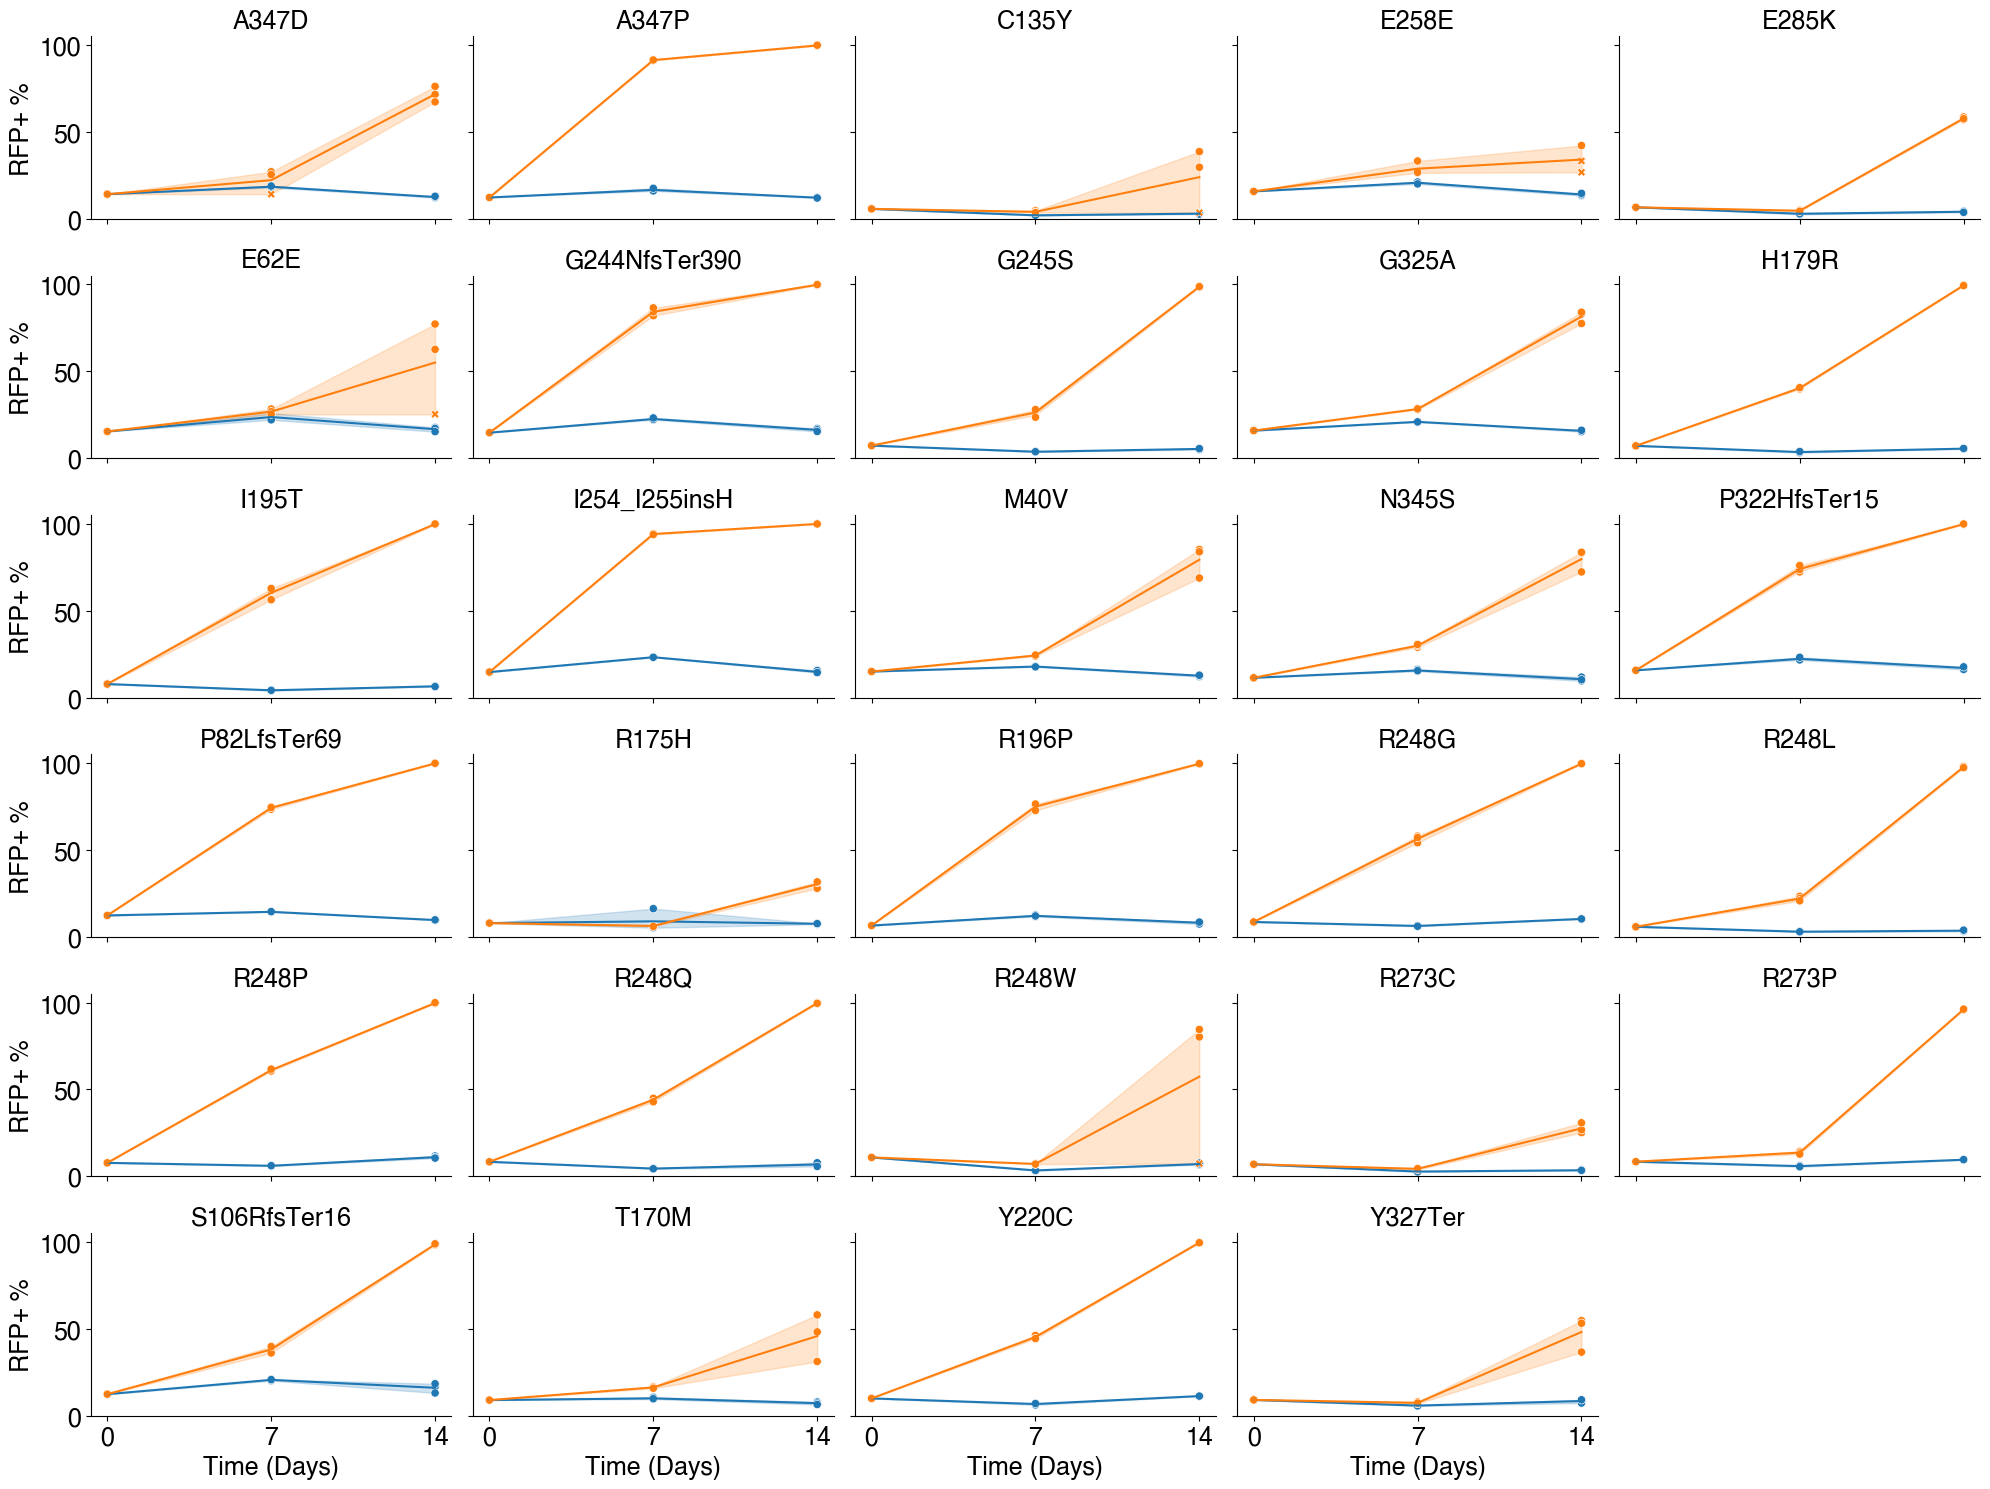

In [94]:
plot_df = a549[a549['pegRNA Identity']!='CONTROL']

sns.set_palette(sns.color_palette("tab10"))


#and plotting
s1 = np.unique(plot_df['pegRNA Identity'])
samp_dict = dict(zip(list(range(1, len(s1)+1)), s1))

fig, ax = plt.subplots(6,5, figsize=(20,15), sharex=True, sharey=True)
for i in range(6):
    for k in range(5):
        row = i%6
        col = k
        sample_num = k +1+ i*5 
        if sample_num<=len(s1):
            sns.lineplot(data = plot_df[plot_df['pegRNA Identity']==samp_dict[sample_num]], x='Timepoint', y='RFP+ %', hue='Treatment', ax = ax[row][col], legend=False)
            sns.scatterplot(data = plot_df[plot_df['pegRNA Identity']==samp_dict[sample_num]], x='Timepoint', y='RFP+ %', hue='Treatment', style = 'Corrected', markers=['o', 'X'], ax = ax[row][col], legend=False)
            #if sample_num<=29:
            tit = samp_dict[sample_num]
            ax[row][col].set_title(tit, fontsize=18)
            ax[row][col].spines['top'].set_visible(False)
            ax[row][col].spines['right'].set_visible(False)
            ax[row][col].tick_params(axis='both', which='major', labelsize=18)
            ax[row][col].set_ylabel('RFP+ %', fontsize=18)
            ax[row][col].set_xlabel('Time (Days)', fontsize=18)

                
            
        else:
            continue

ax[0][0].set_xticks([0,1,2])
ax[0][0].set_xticklabels([0,7,14])
ax[0][0].set_ylim(0,105)
fig.delaxes(ax[5][4])
fig.tight_layout()

## Extended Data Figure 9c
c, Competition assay results for variant-specific therapeutics. 

In [97]:
merge_w_names = pd.read_csv('competition_asay_data_FULL/Competition_assay_data_drugs.csv')

#taking into account low event numbers
t1 = merge_w_names[merge_w_names['Events_t1']<=400].index
t2 = merge_w_names[merge_w_names['Events_t2']<=400].index

merge_w_names2 = merge_w_names.copy()

for i in t1:
    merge_w_names2.loc[i, "RFP_t1"] = merge_w_names2.iloc[i]['RFP_t0']

for i in t2:
    merge_w_names2.loc[i, "RFP_t2"] = merge_w_names2.iloc[i]['RFP_t1']

In [98]:
melted = merge_w_names2.melt(id_vars = ['Sample_Number', 'Replicate', 'Condition'])

melted = melted[melted['variable'].isin(['RFP_t0', 'RFP_t1', 'RFP_t2'])]
t_dict = {'RFP_t0':0, 'RFP_t1':7, 'RFP_t2':14}

melted['variable'] = [t_dict[i] for i in melted['variable']]
melted = melted.rename(columns = {'variable':'Time (Days)', 'value': 'RFP%'})

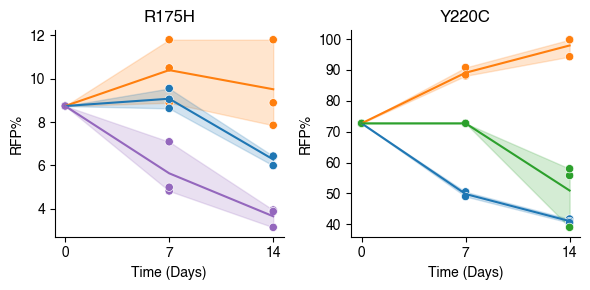

In [104]:
fig, ax = plt.subplots(1,2, figsize=(6,3), sharex=True, sharey=False)

hue_order = ['Nutlin', 'Untreated', 'COTI-2', 'PK7088']
colors = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:green']
for i, val in enumerate([1,5]):
    sample_num = val
    sns.lineplot(data = melted[melted['Sample_Number']==sample_num], x='Time (Days)', y='RFP%', hue='Condition', hue_order = hue_order, palette = colors, ax = ax[i], legend=False)
    sns.scatterplot(data = melted[melted['Sample_Number']==sample_num], x='Time (Days)', y='RFP%', hue='Condition', hue_order = hue_order, palette = colors, ax = ax[i], legend=False)

    tit = merge_w_names2[merge_w_names2['Sample_Number']==sample_num]['HGVSp'].values[0]
    ax[i].set_title(tit)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

ax[0].set_xticks([0,7,14])
fig.tight_layout()